__Note__: Thank you for your interest in my book [Data Science Projects with Python: A case study approach to successful data science projects using Python, pandas, and scikit-learn](https://www.amazon.com/gp/product/1838551026)! This git repo contains all the code referenced in the book. I will periodically update it to make sure it runs with the latest versions of the necessary software. Code cells that are updated from the published text will be noted in comments.

Please see the next cell for the latest versions that are confirmed to work.

Stephen Klosterman

May, 2020

In [1]:
# Load packages and check versions
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import sklearn

print('The Python version is {}.\n'.format(sys.version))
print('The Numpy version is {}.\n'.format(np.__version__))
print('The Pandas version is {}.\n'.format(pd.__version__))
print('The Matplotlib version is {}.\n'.format(mpl.__version__))
print('The Scikit-Learn version is {}.\n'.format(sklearn.__version__))
# The Python version is 3.7.6 (default, Jan  8 2020, 13:42:34) 
# [Clang 4.0.1 (tags/RELEASE_401/final)].

# The Numpy version is 1.18.1.

# The Pandas version is 1.0.1.

# The Matplotlib version is 3.1.3.

# The Scikit-Learn version is 0.22.1.

The Python version is 3.10.7 (tags/v3.10.7:6cc6b13, Sep  5 2022, 14:08:36) [MSC v.1933 64 bit (AMD64)].

The Numpy version is 1.23.2.

The Pandas version is 1.4.4.

The Matplotlib version is 3.5.3.

The Scikit-Learn version is 1.1.2.



# Exercise 2: Loading the Case Study Data in a Jupyter Notebook

# First Jupyter notebook
Welcome to your first jupyter notebook! The first thing to know about Jupyter notebooks is that there are two kinds of cells. This is a markdown cell.

There are a lot of different ways to mark up the text in markdown cells, including __bold__ and *italics*.

The next one will be a `code` cell.

The Business Problem
Our client is a credit card company. They have brought us a dataset that includes
some demographics and recent financial data, over the past 6 months, for a sample
of 30,000 of their account holders. This data is at the credit account level; in other
words, there is one row for each account (you should always clarify what the
definition of a row is, in a dataset). Rows are labeled by whether, in the next month
after the 6-month historical data period, an account owner has defaulted, or in other
words, failed to make the minimum payment.

`Goal`

Your goal is to develop a predictive model for whether an account will default next month, given demographics and historical data. Later in the book, we'll discuss the
practical application of the model.

In [2]:
import pandas as pd

SAMPLES,RESPONSE VARIABLES,DEPENDENT VARIABLES EXAMPLES OR INSTANCES REFER TO THE ROWS
WHILE
FEATURES TARGET OR INDEPENDENT-VARIABLES OR ATTRIBUTES REFER TO THE COLUMNS

Load data

In [3]:
df = pd.read_excel("credit card clients originalversion.xls")
df
#Note this is an xls file

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,ecff42d0-bdc6,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,99d1fa0e-222b,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,95cdd3e7-4f24,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,00d03f02-04cd,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [4]:
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [6]:
df.shape #(To know Number of rows and columns)

(30000, 25)

In [7]:
df.EDUCATION.nunique()# value shows education is not Categorical, it is numerical(a continuous value), 
#it doesn't answer yes or no or maybe shows number of unique values in that dataset

7

In [36]:
df["EDUCATION"].unique() #to see the unique values in that column

array([2, 1, 3, 5, 0, 4, 6], dtype=int64)

In [37]:
df.BILL_AMT4 # we can use it for our range


0            0
1         3272
2        14331
3        28314
4        20940
         ...  
29995    88004
29996     8979
29997    20878
29998    52774
29999    36535
Name: BILL_AMT4, Length: 30000, dtype: int64

In [38]:
df.SEX.nunique()

3

In [39]:
df.SEX.value_counts()#This one is catgorical, ID is categorical

2    17910
1    11775
0      315
Name: SEX, dtype: int64

According to the Data Dictionary

 Gender (1 = male; 2 = female). Gender is Categorical

In [40]:
df["SEX_CAT"]="none"
df 
# df["SEX_CAT"]="none"
# df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,SEX_CAT
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,none
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,none
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,none
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,none
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,ecff42d0-bdc6,220000,1,3,1,39,0,0,0,0,...,31237,15980,8500,20000,5003,3047,5000,1000,0,none
29996,99d1fa0e-222b,150000,1,3,2,43,-1,-1,-1,-1,...,5190,0,1837,3526,8998,129,0,0,0,none
29997,95cdd3e7-4f24,30000,1,2,2,37,4,3,2,-1,...,20582,19357,0,0,22000,4200,2000,3100,1,none
29998,00d03f02-04cd,80000,1,3,1,41,1,-1,0,0,...,11855,48944,85900,3409,1178,1926,52964,1804,1,none


In [43]:
# dfa=df[["SEX","SEX_CAT"]].head()
# dfa
dfa=df[["SEX", "SEX_CAT"]].head()
dfa

,SEX,SEX_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,1,none


In [44]:
df.isna()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,SEX_CAT
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [45]:
dog_mapping= {
    0:"Others",
    1:"Male",
    2:"Female"
}

In [46]:
dfa["SEX_CAT"]=dfa["SEX"].map(dog_mapping) 

In [47]:
dfa[["SEX", "SEX_CAT"]].head(10)

,SEX,SEX_CAT
0,2,Female
1,2,Female
2,2,Female
3,2,Female
4,1,Male


In [48]:
dfa_ohe=pd.get_dummies(dfa["SEX_CAT"])# converting from text to Numerical Feature
dfa_ohe.head(10)

,Female,Male
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1


O.H.E turns from long to a wide view

In [49]:
dfa.head(2)

,SEX,SEX_CAT
0,2,Female
1,2,Female


In [50]:
dfa_ohe.head(2)

,Female,Male
0,1,0
1,1,0


In [51]:
# dfa_and_ohe=pd.concat([dfa,dfa_ohe], axis=1)

dfa_and_ohe=pd.concat([dfa,dfa_ohe], axis=1)

In [52]:
dfa_and_ohe.head(10)

,SEX,SEX_CAT,Female,Male
0,2,Female,1,0
1,2,Female,1,0
2,2,Female,1,0
3,2,Female,1,0
4,1,Male,0,1


In [53]:
df.isna().sum() # to check for each column how much missing data is there in each column

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
SEX_CAT                       0
dtype: int64

# A row in a Dataset is called a Sample or observations
# A column is called a feature,response or metadata

# Exercise 3: Verifying Basic Data Integrity

The data consist of one month of credit card account information, with historical data looking back six months. A basic quality check is to make sure that we have data for as many accounts as we think we do. In particular, account IDs should all be distinct. We can check to see the number of distinct ID's with the Pandas function `.nunique()`.

In [54]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'SEX_CAT'],
      dtype='object')

Besides the point, there is such a thing like .isin() , like `in` in normal python or `SQL`

Using Continue, continue skips that line and keeps on printing

We use features to determine our Response Variable

In [55]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,SEX_CAT
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,none
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,none
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,none
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,none
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,none


In [56]:
df.shape

(30000, 26)

In [57]:
df["ID"].nunique()# It shows us that there is a problem somewhere, as all Account Id's are ought to be distinct

29687

In [58]:
df['ID'].nunique()#To count the number of unique values in the ID column

29687

Has less than the number of rows, so there are some duplicates somewhere.

In [61]:
id_counts=df["ID"].value_counts() # shows the counts of unique values

In [63]:
id_counts = df['ID'].value_counts()#value_counts always returns series 
#Return a Series containing counts of unique rows in the DataFrame. It doesn't count NaN values
id_counts.head()

ad23fe5c-7b09    2
1fb3e3e6-a68d    2
89f8f447-fca8    2
7c9b7473-cc2f    2
90330d02-82d9    2
Name: ID, dtype: int64

Find a way to store the numbers above excluding the ID

In [65]:
double= id_counts[id_counts>=2]#subsetting the df because it'd have given us boolean values which compared id_counts 
                                # numbers appearing two times or higher, WE ARE FILTERING IT
print(double.head())# the id's are now indexes of the id_count
#the number of the id's are now the values
print()
print(double.shape)  #means a series not a dataframe

ad23fe5c-7b09    2
1fb3e3e6-a68d    2
89f8f447-fca8    2
7c9b7473-cc2f    2
90330d02-82d9    2
Name: ID, dtype: int64

(313,)


In [68]:
gb=pd.DataFrame(df["ID"],df["ID"].value_counts())
gb
#ID comes with the duplicates

,ID
ID,
2,85698822-43f5
2,85698822-43f5
2,85698822-43f5
2,85698822-43f5
2,85698822-43f5
...,...
1,8a8c8f3b-8eb4
1,8a8c8f3b-8eb4
1,8a8c8f3b-8eb4


In [70]:
id_counts.value_counts()

1    29374
2      313
Name: ID, dtype: int64

# Boolean masks(just an explanation)
Mask is like a prototype a shadow of something

In [34]:
import numpy as np

In [35]:
# np.random.seed(seed=24)#seed gives you the same output everytime
# random_integers = np.random.randint(low=1,high=5,size=100)
np.random.seed(seed=24)# you can pick any number 24,23, whatever
random_integers=np.random.randint(low=1,high=5,size=100)
random_integers

array([3, 4, 1, 4, 2, 2, 2, 1, 4, 4, 1, 4, 4, 3, 4, 4, 4, 4, 4, 4, 2, 3,
       4, 4, 2, 4, 2, 4, 1, 1, 3, 1, 4, 2, 2, 1, 4, 3, 2, 2, 3, 3, 2, 3,
       4, 2, 3, 4, 1, 3, 4, 2, 2, 4, 1, 2, 3, 3, 2, 1, 2, 4, 2, 1, 4, 3,
       1, 2, 1, 3, 4, 2, 3, 4, 1, 3, 2, 1, 1, 3, 3, 4, 3, 2, 4, 1, 4, 4,
       4, 4, 1, 4, 3, 2, 4, 4, 3, 3, 2, 4])

In [36]:
random_integers[:5]# first 5 numbers

array([3, 4, 1, 4, 2])

In [37]:
is_equal_to_3 = random_integers == 3 # comparison 

In [38]:
is_equal_to_3[:5]

array([ True, False, False, False, False])

In [39]:
# sum(is_equal_to_3)
is_equal_to_3.sum()
#  number of values that are equal to 3

#  sum all the values that are true for me i.e. the ones that are eaual to 3 out of the 100

22

In [40]:
random_integers[is_equal_to_3]
#subsetting random_integers to get only the values that are "is_equal_to_3" 


array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

# Exercise 4: Continuing Verification of Data Integrity

In [74]:
dupe_mask = id_counts == 2
#dupe_mask equals to id_counts that have 2 as a value

In [42]:
# dupe_mask = id_counts == 2
# dupe_mask.sum()

In [75]:
dupe_mask[0:5]#same as .head()
# Remember that dupe_mask compares the value with id_counts

# id_counts = df['ID'].value_counts()#value_counts always returns series which is the ID column
# id_counts.head( )


ad23fe5c-7b09    True
1fb3e3e6-a68d    True
89f8f447-fca8    True
7c9b7473-cc2f    True
90330d02-82d9    True
Name: ID, dtype: bool

id_counts=df.ID.value_counts

In [81]:
# id_counts.index[0:5]
id_counts.index[0:5]
# .index means the row index or row address of the value_counts(the ones that appear 1 or 2 times in the df)

Index(['ad23fe5c-7b09', '1fb3e3e6-a68d', '89f8f447-fca8', '7c9b7473-cc2f',
       '90330d02-82d9'],
      dtype='object')

In [77]:
dupe_ids = id_counts.index[dupe_mask]# subsetting only the indexes
#Select and store the duplicated ID's(which is dupe_mask) in a new variable called dupe_ids using the following command:
#We get indexes corresponding to 2
dupe_ids             # this shows all the duplicated values in id_counts, the datatype and the length also,
                    #it shows all the info about a particular column i.e. the the row index or row address
                    # about that column
        
#In Summary Print out all the row addresses of dupe_mask
# dupe_ids=id_counts.index[dupe_mask]
# dupe_ids

Index(['ad23fe5c-7b09', '1fb3e3e6-a68d', '89f8f447-fca8', '7c9b7473-cc2f',
       '90330d02-82d9', '2a793ecf-05c6', '75938fec-e5ec', '7be61027-a493',
       'a3a5c0fc-fdd6', 'b44b81b2-7789',
       ...
       '4f249cbc-5e9c', '40e75290-0f59', 'fc73f07e-eb96', '2a8ad33f-fa9c',
       'cdae2be5-8ec4', 'c69162db-4864', '73ea498f-44b2', '327d06d5-ce7f',
       'd13465a5-a9e0', '841ae407-dc4c'],
      dtype='object', length=313)

In [87]:
# dupe_ids = list(dupe_ids)# typecasting the array to a list
# #only the list is what you can use in a dataframe
# len(dupe_ids)
dupe_ids= list(dupe_ids)
len(dupe_ids)

313

In [47]:
dupe_ids[0:5]#we now have a proper list

['ad23fe5c-7b09',
 '1fb3e3e6-a68d',
 '89f8f447-fca8',
 '7c9b7473-cc2f',
 '90330d02-82d9']

# NB:  isin is a method in pandas same way you use `(`in`)` for a list

In [48]:
df["ID"] #these are the original ID's in the Column or Series ID's
# while dupe_ids are the ones that are duplicated or the duplicates that has 2ID's

0        798fc410-45c1
1        8a8c8f3b-8eb4
2        85698822-43f5
3        0737c11b-be42
4        3b7f77cc-dbc0
             ...      
29995    ecff42d0-bdc6
29996    99d1fa0e-222b
29997    95cdd3e7-4f24
29998    00d03f02-04cd
29999    15d69f9f-5ad3
Name: ID, Length: 30000, dtype: object

Using our first 3ID's on our list of dupes, dupe_ids[0:3], we will plan to first find the rows containing these ID's. If we pass this list of IDs to the <b>.isin</b> method of the ID series, this will create another logical mask we can use on the Larger DataFrame to display the rows that have these IDs. The <b>.isin</b> method is nested in a <b>.loc</b> statement indexing the DataFrame in order to select the location of all rows containing True in the Boolean mask. 

The second argument of the .loc statement is : which implies that all columns will be selected.

We are actually filtering the DF in order to view all the columns for the first three duplicate ID's

In [88]:
#df.loc[df['ID'].isin(dupe_ids[0:3]),:]n
df['ID'].isin(dupe_ids[0:3])# this defines our index(It actually compares the values in df["ID"] with dupe_ids[0:3])
#  which is df["ID"] compared with  the first 3 elements that have duplicates ID's 
#  which gives us Boolean since we are comparing
#  which is why we see so many false values
#  then the other colon define or columns checking from the first to the last column
# 'so subsetting it gives'


0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Name: ID, Length: 30000, dtype: bool

In [50]:
df.loc[df['ID'].isin(dupe_ids[0:3]),:]# the first 3 elements of the duplicates that have 
                                    # appeared twice will give us give us 6 rows

# The values in ID column that appears as duplicates, 
# #print out first 3 values(which is the values and its duplicates) 
#that appears and all the columns

# The values in ID(original) in the duplicates so e.g if "5" appears twice in the original 
# and dupe_ids which reps the duplicates has "5", then print all instances of 5 and its corresponding columns since
# it is in the duplicate values, since dupeids is rep'd dupe_ids[0:3], it means print all duplicates of "5" 3 times
# which gives 6 values

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,SEX_CAT
5033,89f8f447-fca8,320000,2,2,1,32,0,0,0,0,...,172868,150827,8000,8000,5500,6100,6000,5000,0,none
5133,89f8f447-fca8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,none
16727,1fb3e3e6-a68d,80000,1,2,2,33,2,2,0,0,...,29922,31879,0,2000,2000,3000,2600,0,1,none
16827,1fb3e3e6-a68d,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,none
29685,ad23fe5c-7b09,50000,1,3,1,32,0,0,0,0,...,8131,3983,3000,2871,1000,163,3983,3771,1,none
29785,ad23fe5c-7b09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,none


In [51]:
# df.loc[df['ID'].isin(dupe_ids[0:3]),:]

In [52]:
# my_own_df_zero_mask=df.iloc[:,:]== 0
# my_own_df_zero_mask
#Trying stuff out

We can see some duplicates here, and it looks like every duplicate ID has one row with data, and another row with all zeros. Is this the case for every duplicate ID? Let's check.

In [53]:
df.shape

(30000, 26)

In [54]:
df_zero_mask = df == 0     # creating a mask that compares to zero
                           #we are subsetting the entire dataset to zero(0)

In [55]:
df_zero_mask.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,SEX_CAT
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,True,True,True,True,False,False
1,False,False,False,False,False,False,False,False,True,True,...,False,False,True,False,False,False,True,False,False,False
2,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,True,False


<b>Iloc</b>--> Integer indexing works for the row number(or indexes) and column number(last number is exclusive)

<!-- Iloc concentrates on the index not the columns
Trying to get samples that have all true -->

In [56]:
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1) #axis="columns" is column wise or for rows
# or axis=1, apart from drop function axis=1 kind of works for the rows
#from first index to the last, 
            #then column1 to the end excluding the default payment next month
    #.all works like `and` for dataFrame but retuns series

In [57]:
feature_zero_mask=df_zero_mask.iloc[:,1:].all(axis=1)

In [58]:
feature_zero_mask # checks the whole dataset for true and false

0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Length: 30000, dtype: bool

In [59]:
feature_zero_mask == True

0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Length: 30000, dtype: bool

In [60]:
feature_zero_mask[feature_zero_mask]
#I just subset it to give me only the ones that are true
#Some columns are not repeated but still have 0 samples

Series([], dtype: bool)

In [61]:
sum(feature_zero_mask)
#means there are more samples that didn't repeat themselves but their entire features are zero0

0

It looks like there are at least as many "zero rows" as there are duplicate IDs. Let's remove all the rows with all zero features and response, and see if that gets rid of the duplicate IDs.

feature_zero_mask saves the entire samples of df that is true to equal to zero

In [62]:
df_clean_1 = df.loc[~feature_zero_mask,:].copy() #~ this sign means NOT
# we are subsetting the `not` entire dataset by feature zero mask
# This takes out the Not True or false i.e. the ones not equal to zero of the whole datset

In [63]:
df_clean_1.shape

(30000, 26)

In [64]:
df_clean_1['ID'].nunique()

29687

Looks like this worked.

In [65]:
df_clean_1.to_excel("df_cleaned a bit.xlsx", index=True)#Saving my Progress

# Exercise 5: Exploring and Cleaning the Data

In [66]:
df_clean_1.info()
# shows the Datatype and Count of each column, a very important Data Exploration tip
#The columns or numeric features are ought to be int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  int64 
 3   EDUCATION                   30000 non-null  int64 
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_1                       30000 non-null  object
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

In [67]:
df_clean_1.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,SEX_CAT
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,none
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,none
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,none
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,none
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,none


In [68]:
df_clean_1['PAY_1'].head(5)

0     2
1    -1
2     0
3     0
4    -1
Name: PAY_1, dtype: object

In [69]:
df_clean_1['PAY_1'].value_counts()

0                13402
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

Let's throw out these missing values, which were initially hidden from us in the `.info()` output, now.

In [70]:
valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available'# the !=(does not equal) used to find all rows that don't
                                                        # have missing data for the PAY_1 feature

In [71]:
valid_pay_1_mask[0:5]

0    True
1    True
2    True
3    True
4    True
Name: PAY_1, dtype: bool

In [72]:
valid_pay_1_mask.head(10)

0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
8    True
9    True
Name: PAY_1, dtype: bool

In [73]:
sum(valid_pay_1_mask)#sums all values in (valid_pay_1_mask)

26979

### Remember 
#### df_clean_1 = df.loc[`~`feature_zero_mask,:].copy() #~ this sign means NOT
#### This removes the rows equal to zero

In [74]:
df_clean_2 = df_clean_1.loc[valid_pay_1_mask,:].copy()
#we use loc to subset it

In [75]:
df_clean_2 

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,SEX_CAT
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,none
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,none
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,none
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,none
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,ecff42d0-bdc6,220000,1,3,1,39,0,0,0,0,...,31237,15980,8500,20000,5003,3047,5000,1000,0,none
29996,99d1fa0e-222b,150000,1,3,2,43,-1,-1,-1,-1,...,5190,0,1837,3526,8998,129,0,0,0,none
29997,95cdd3e7-4f24,30000,1,2,2,37,4,3,2,-1,...,20582,19357,0,0,22000,4200,2000,3100,1,none
29998,00d03f02-04cd,80000,1,3,1,41,1,-1,0,0,...,11855,48944,85900,3409,1178,1926,52964,1804,1,none


In [76]:
df_clean_2.shape

(26979, 26)

In [77]:
df_clean_2['PAY_1'].value_counts()

 0    13402
-1     5047
 1     3261
-2     2476
 2     2378
 3      292
 4       63
 5       23
 8       17
 6       11
 7        9
Name: PAY_1, dtype: int64

In [78]:
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')

In [79]:
# df_clean_2['PAY_1'].info()
# You can't find info for 1 column on Jupyter Notebook.

In [80]:
df_clean_2[['PAY_1', 'PAY_2']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26979 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26979 non-null  int64
 1   PAY_2   26979 non-null  int64
dtypes: int64(2)
memory usage: 632.3 KB


In [ ]:
df_clean_2.to_excel("default_cleaned_2.xlsx", index=False)

# Exercise 6: Exploring the Credit Limit and Demographic Features

In [ ]:
import matplotlib.pyplot as plt #import plotting package

#render plotting automatically
%matplotlib inline

import matplotlib as mpl #additional plotting functionality

mpl.rcParams['figure.dpi'] = 400 #high resolution figures

array([[<AxesSubplot: title={'center': 'LIMIT_BAL'}>,
        <AxesSubplot: title={'center': 'AGE'}>]], dtype=object)

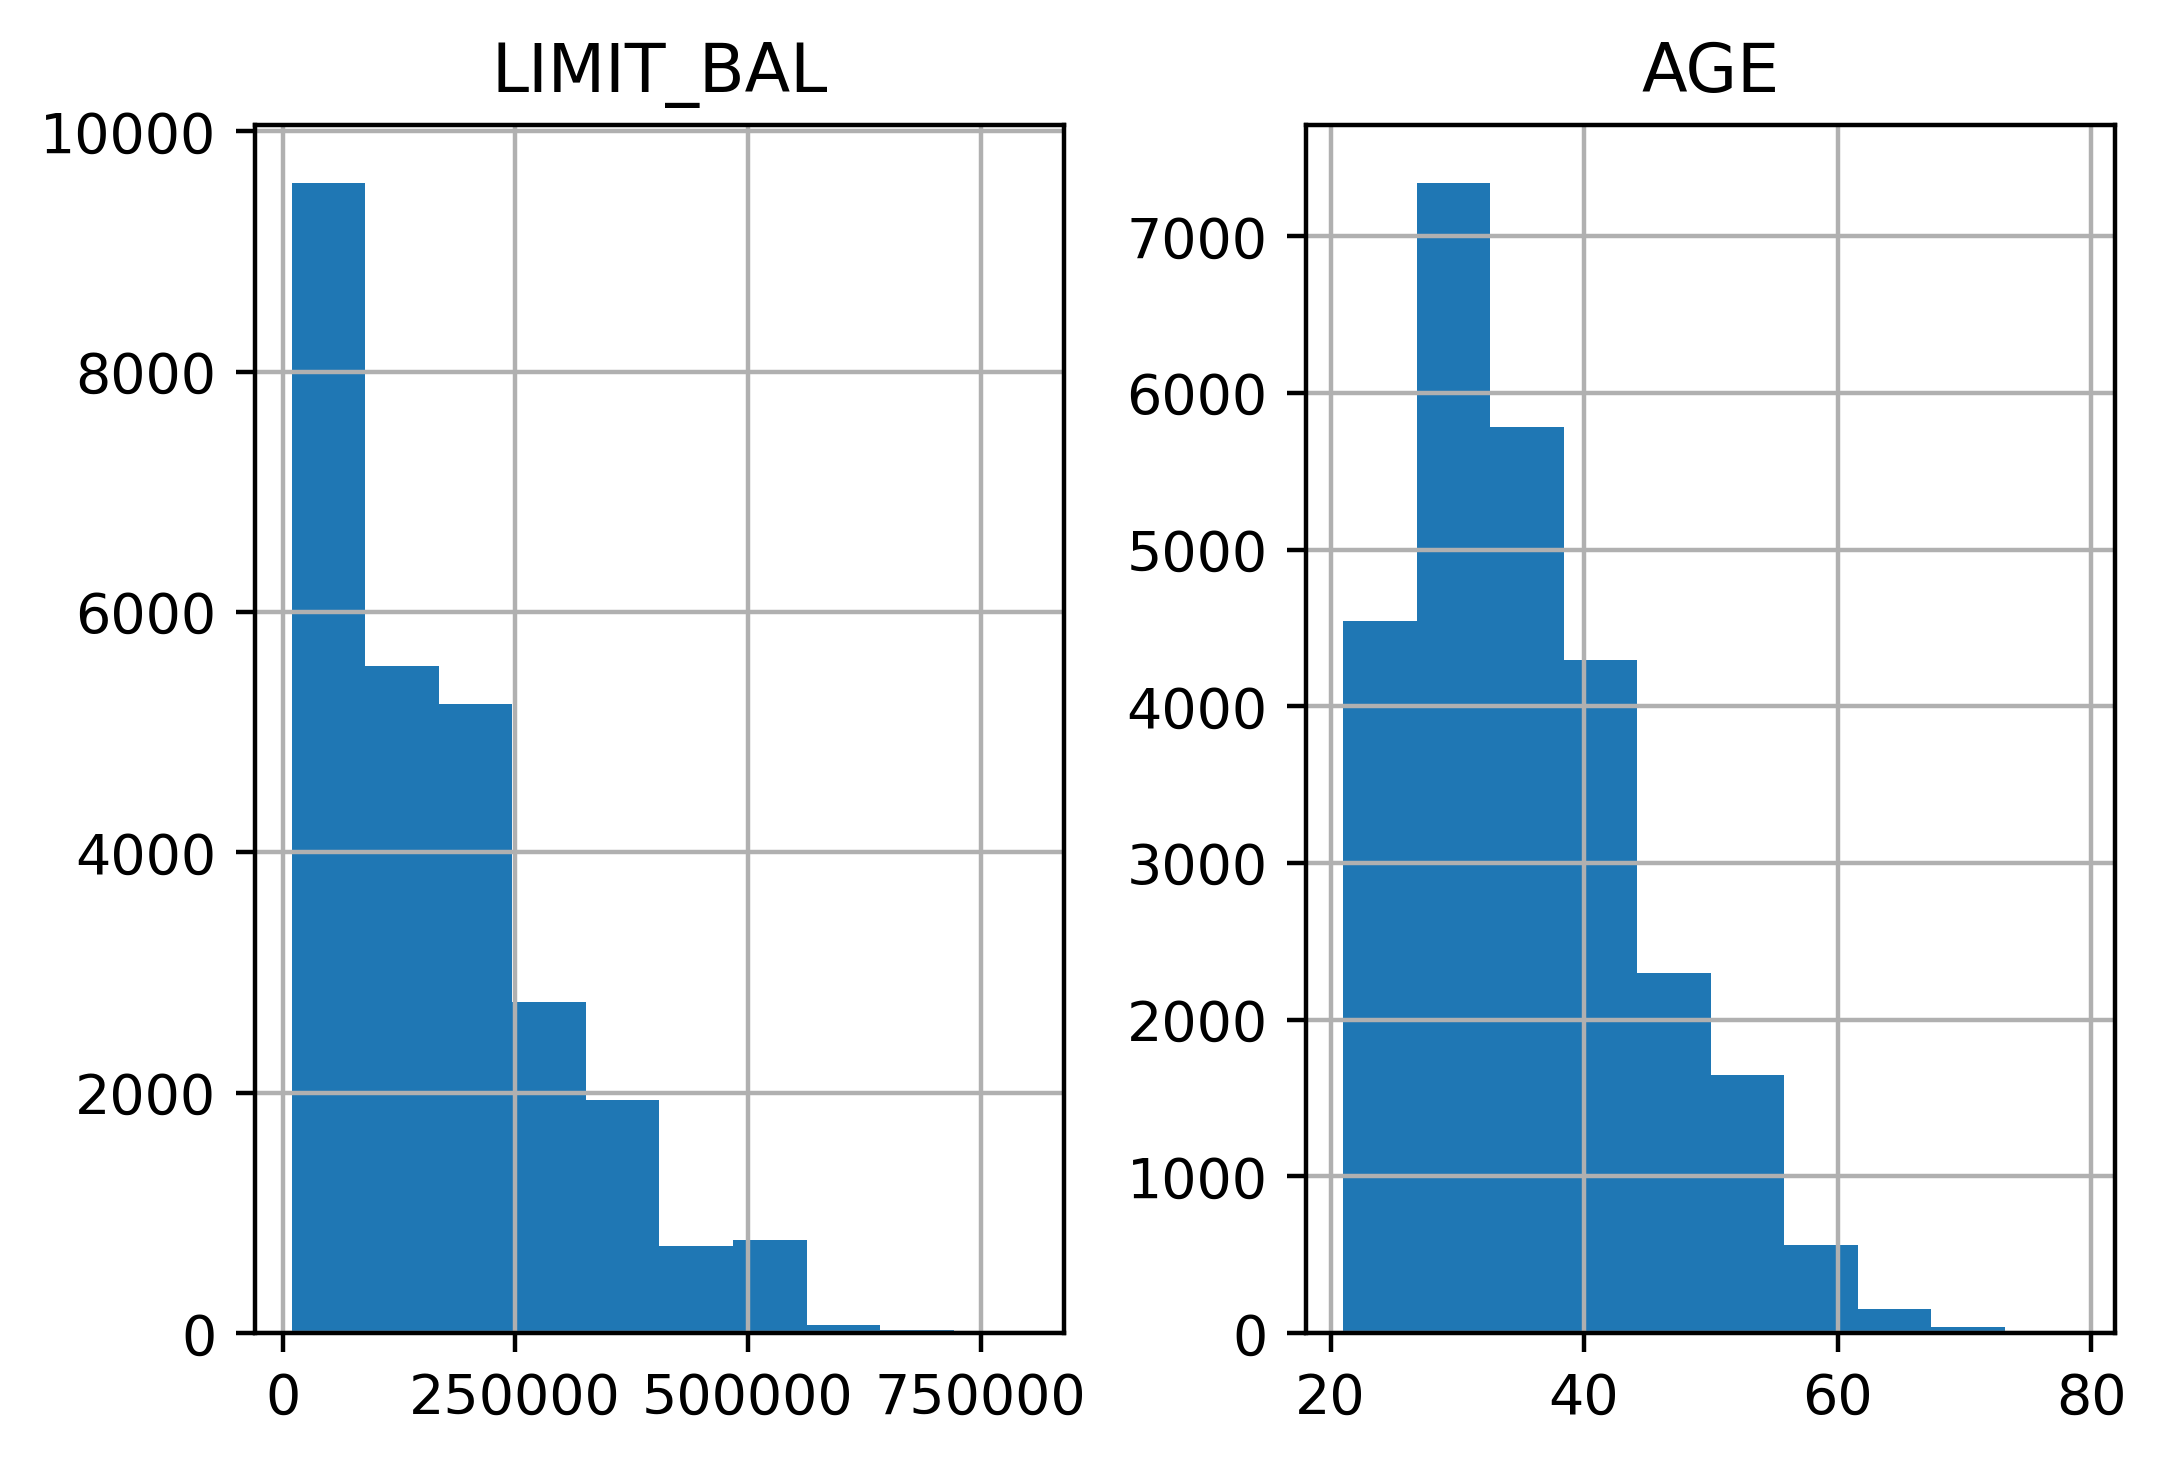

In [ ]:
# df_clean_2[['LIMIT_BAL', 'AGE']].hist()
df_clean_2[["LIMIT_BAL", "AGE"]].hist()

In [ ]:
df_clean_2[['LIMIT_BAL', 'AGE']].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


In [ ]:
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: EDUCATION, dtype: int64

"Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)"

Assign unknown categories to other.

In [ ]:
# df_clean_2['EDUCATION'].replace(to_replace=[0, 5, 6], value=4, inplace=True)
df_clean_2["EDUCATION"].replace(to_replace=[0,5,6], value=4, inplace=True)

In [ ]:
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

Examine and clean marriage feature as well:

In [ ]:
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
0      363
3      286
Name: MARRIAGE, dtype: int64

In [ ]:
#Should only be (1 = married; 2 = single; 3 = others).
# df_clean_2['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)
df_clean_2["MARRIAGE"].replace(to_replace=0, value=3, inplace=True)
# Note that here we make this change in place (inplace=True). This means
#that, instead of returning a new DataFrame, this operation will make the change
#on the existing DataFrame.

In [ ]:
# df_clean_2['MARRIAGE'].value_counts()
df_clean_2["MARRIAGE"].value_counts()

2    14158
1    12172
3      649
Name: MARRIAGE, dtype: int64

In [ ]:
df["EDUCATION"].head(50)

0     2
1     2
2     2
3     2
4     2
5     1
6     1
7     2
8     3
9     3
10    3
11    1
12    2
13    2
14    1
15    3
16    1
17    1
18    1
19    1
20    3
21    2
22    2
23    1
24    1
25    3
26    1
27    3
28    3
29    1
30    1
31    2
32    1
33    2
34    1
35    1
36    2
37    2
38    1
39    1
40    1
41    1
42    2
43    2
44    1
45    1
46    1
47    5
48    2
49    1
Name: EDUCATION, dtype: int64

In [ ]:
from scipy import stats
import numpy as np

Generate some synthetic near-linear data:

In [ ]:
X = np.array(range(1,11))

In [ ]:
X

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
np.random.seed(seed=24)
Y = 2*X + np.random.normal(0, 1, 10)

In [ ]:
slope_line, intercept_line, r_value, p_value, std_err = stats.linregress(X,Y)

([<matplotlib.axis.YTick at 0x24536aa4e20>,
 [Text(0, 0, '0'),
  Text(0, 5, '5'),
  Text(0, 10, '10'),
  Text(0, 15, '15'),
  Text(0, 20, '20')])

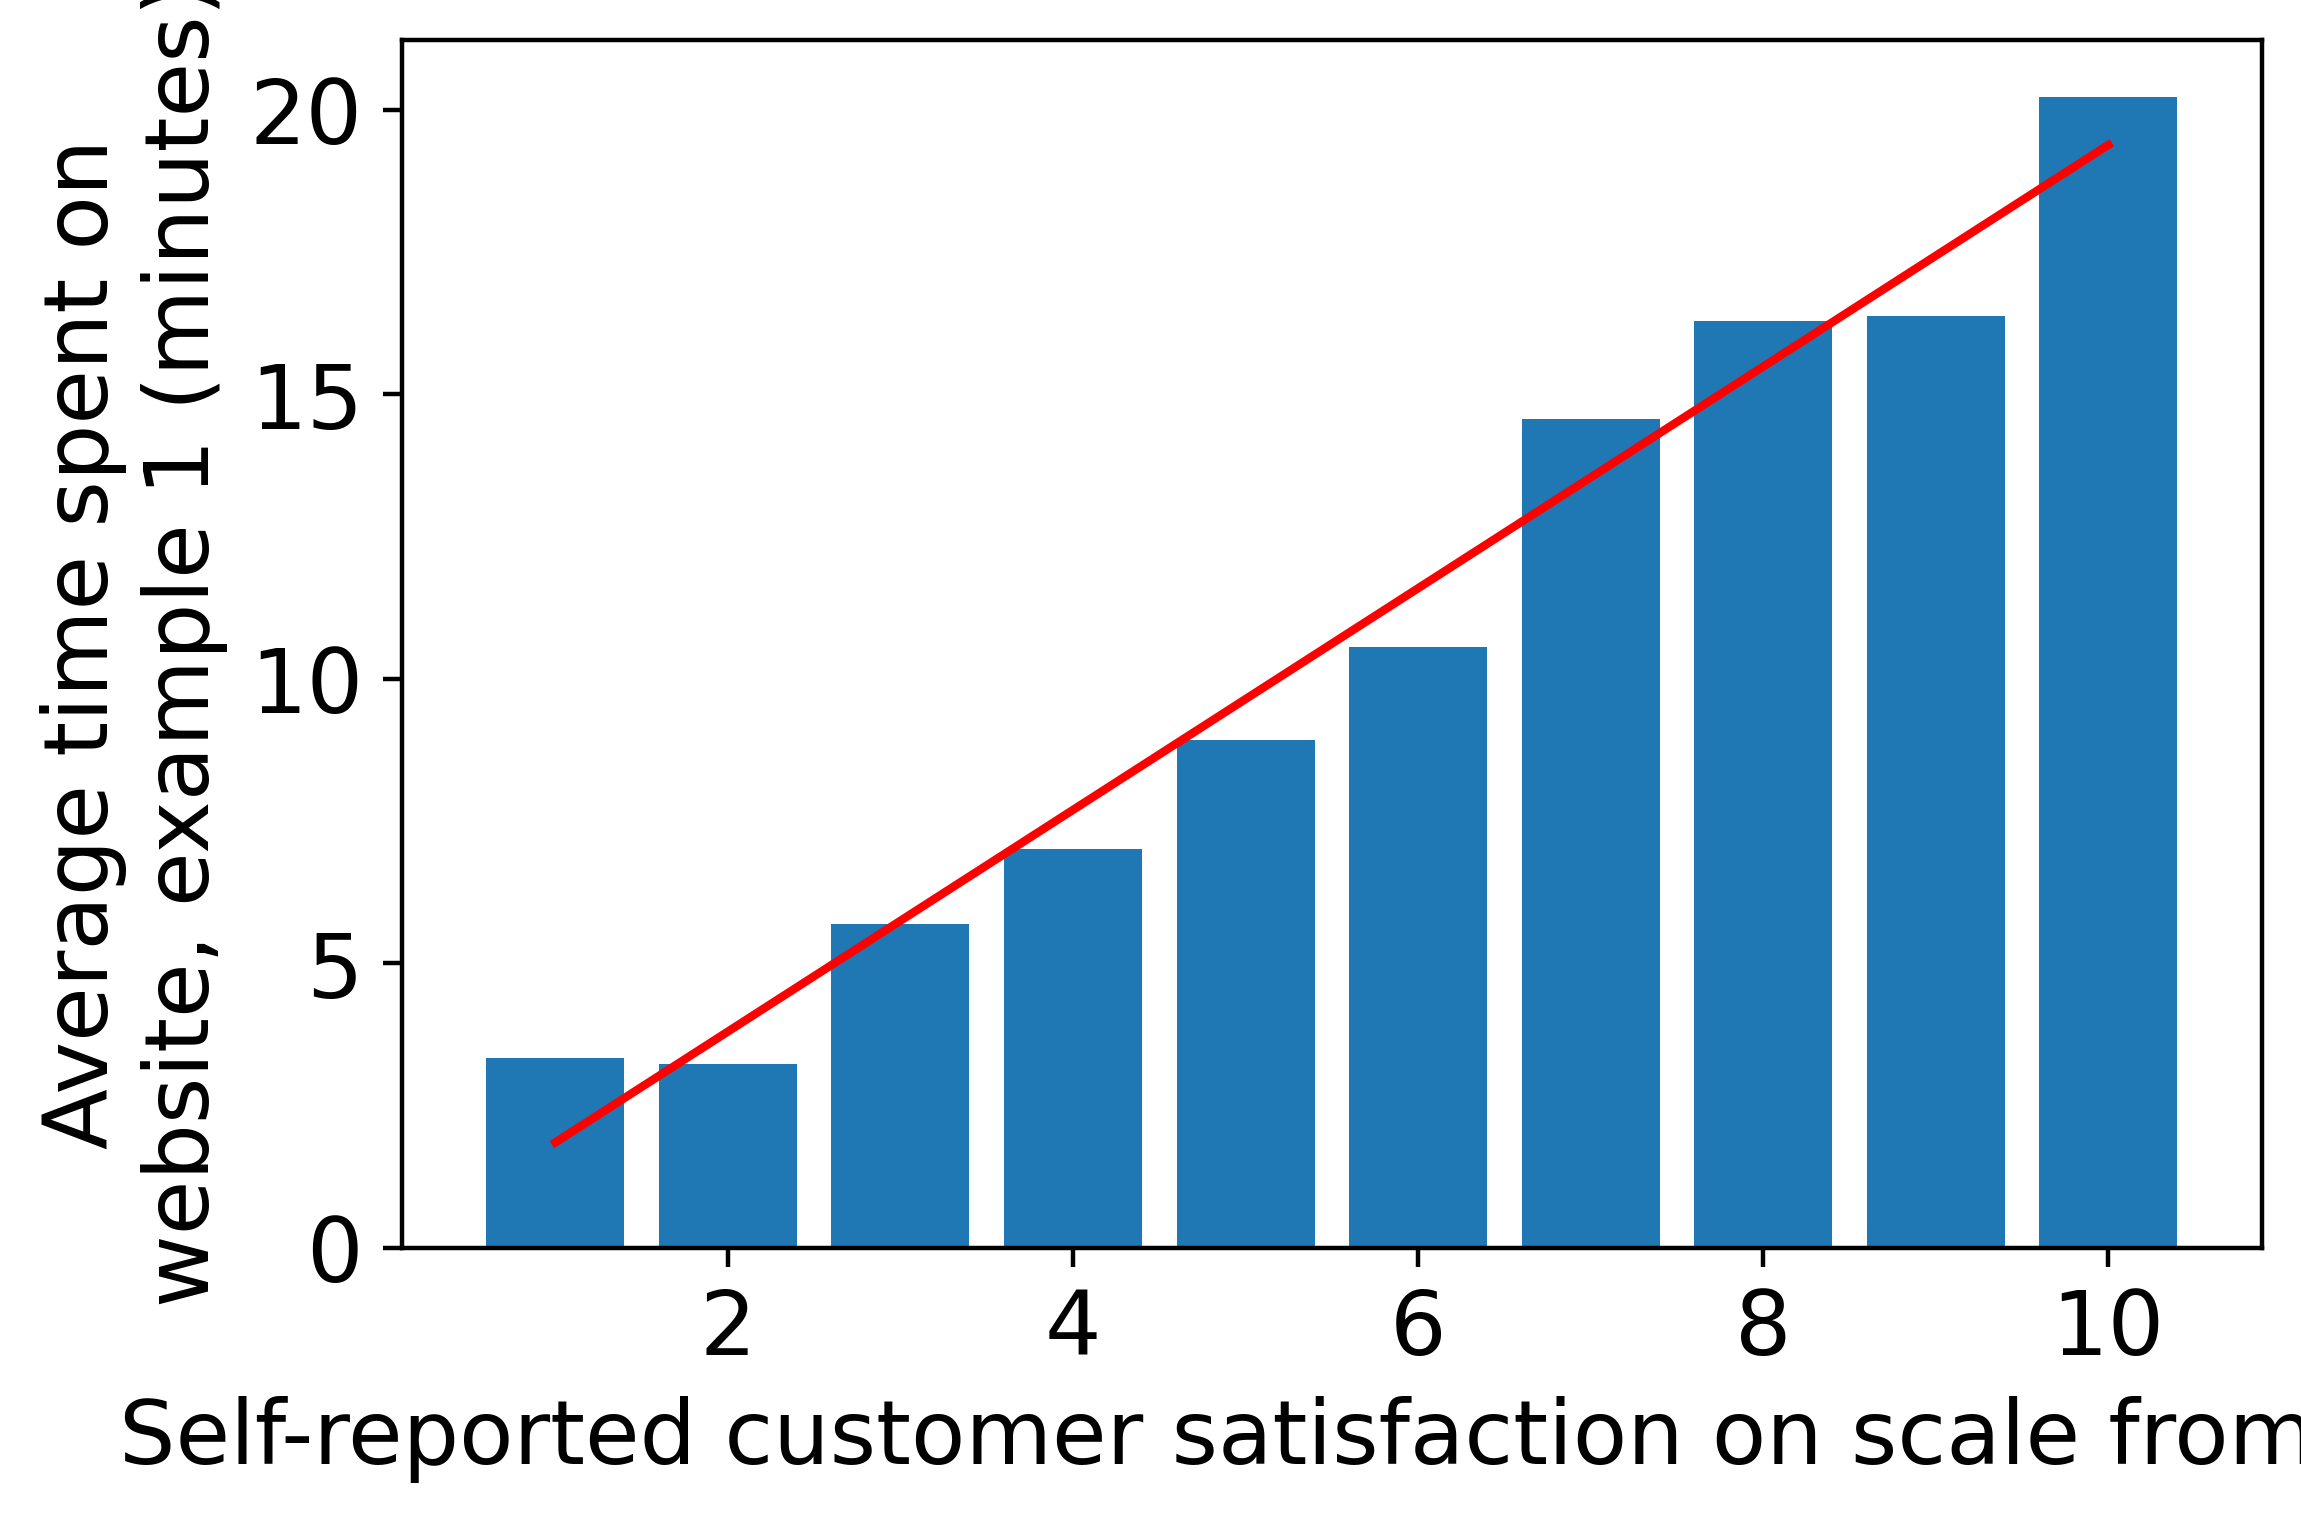

In [ ]:
mpl.rcParams['figure.dpi'] = 400
mpl.rcParams['font.size'] = 16
plt.plot(X, intercept_line + slope_line*X, 'r-')
plt.bar(X,Y, align='center')
plt.xlabel('Self-reported customer satisfaction on scale from 1-10')
plt.ylabel('Average time spent on\nwebsite, example 1 (minutes)')
plt.yticks(range(0,25,5))

And some synthetic polynomial data

In [ ]:
np.random.seed(seed=20)
noise = np.random.normal(0, 1, 10)
Y_poly = -1*(X-2)*(X-9) + 10 + noise

In [ ]:
slope_poly, intercept_poly, r_value, p_value, std_err = stats.linregress(X,Y_poly)

Text(0, 0.5, 'Average time spent on\nwebsite, example 2 (minutes)')

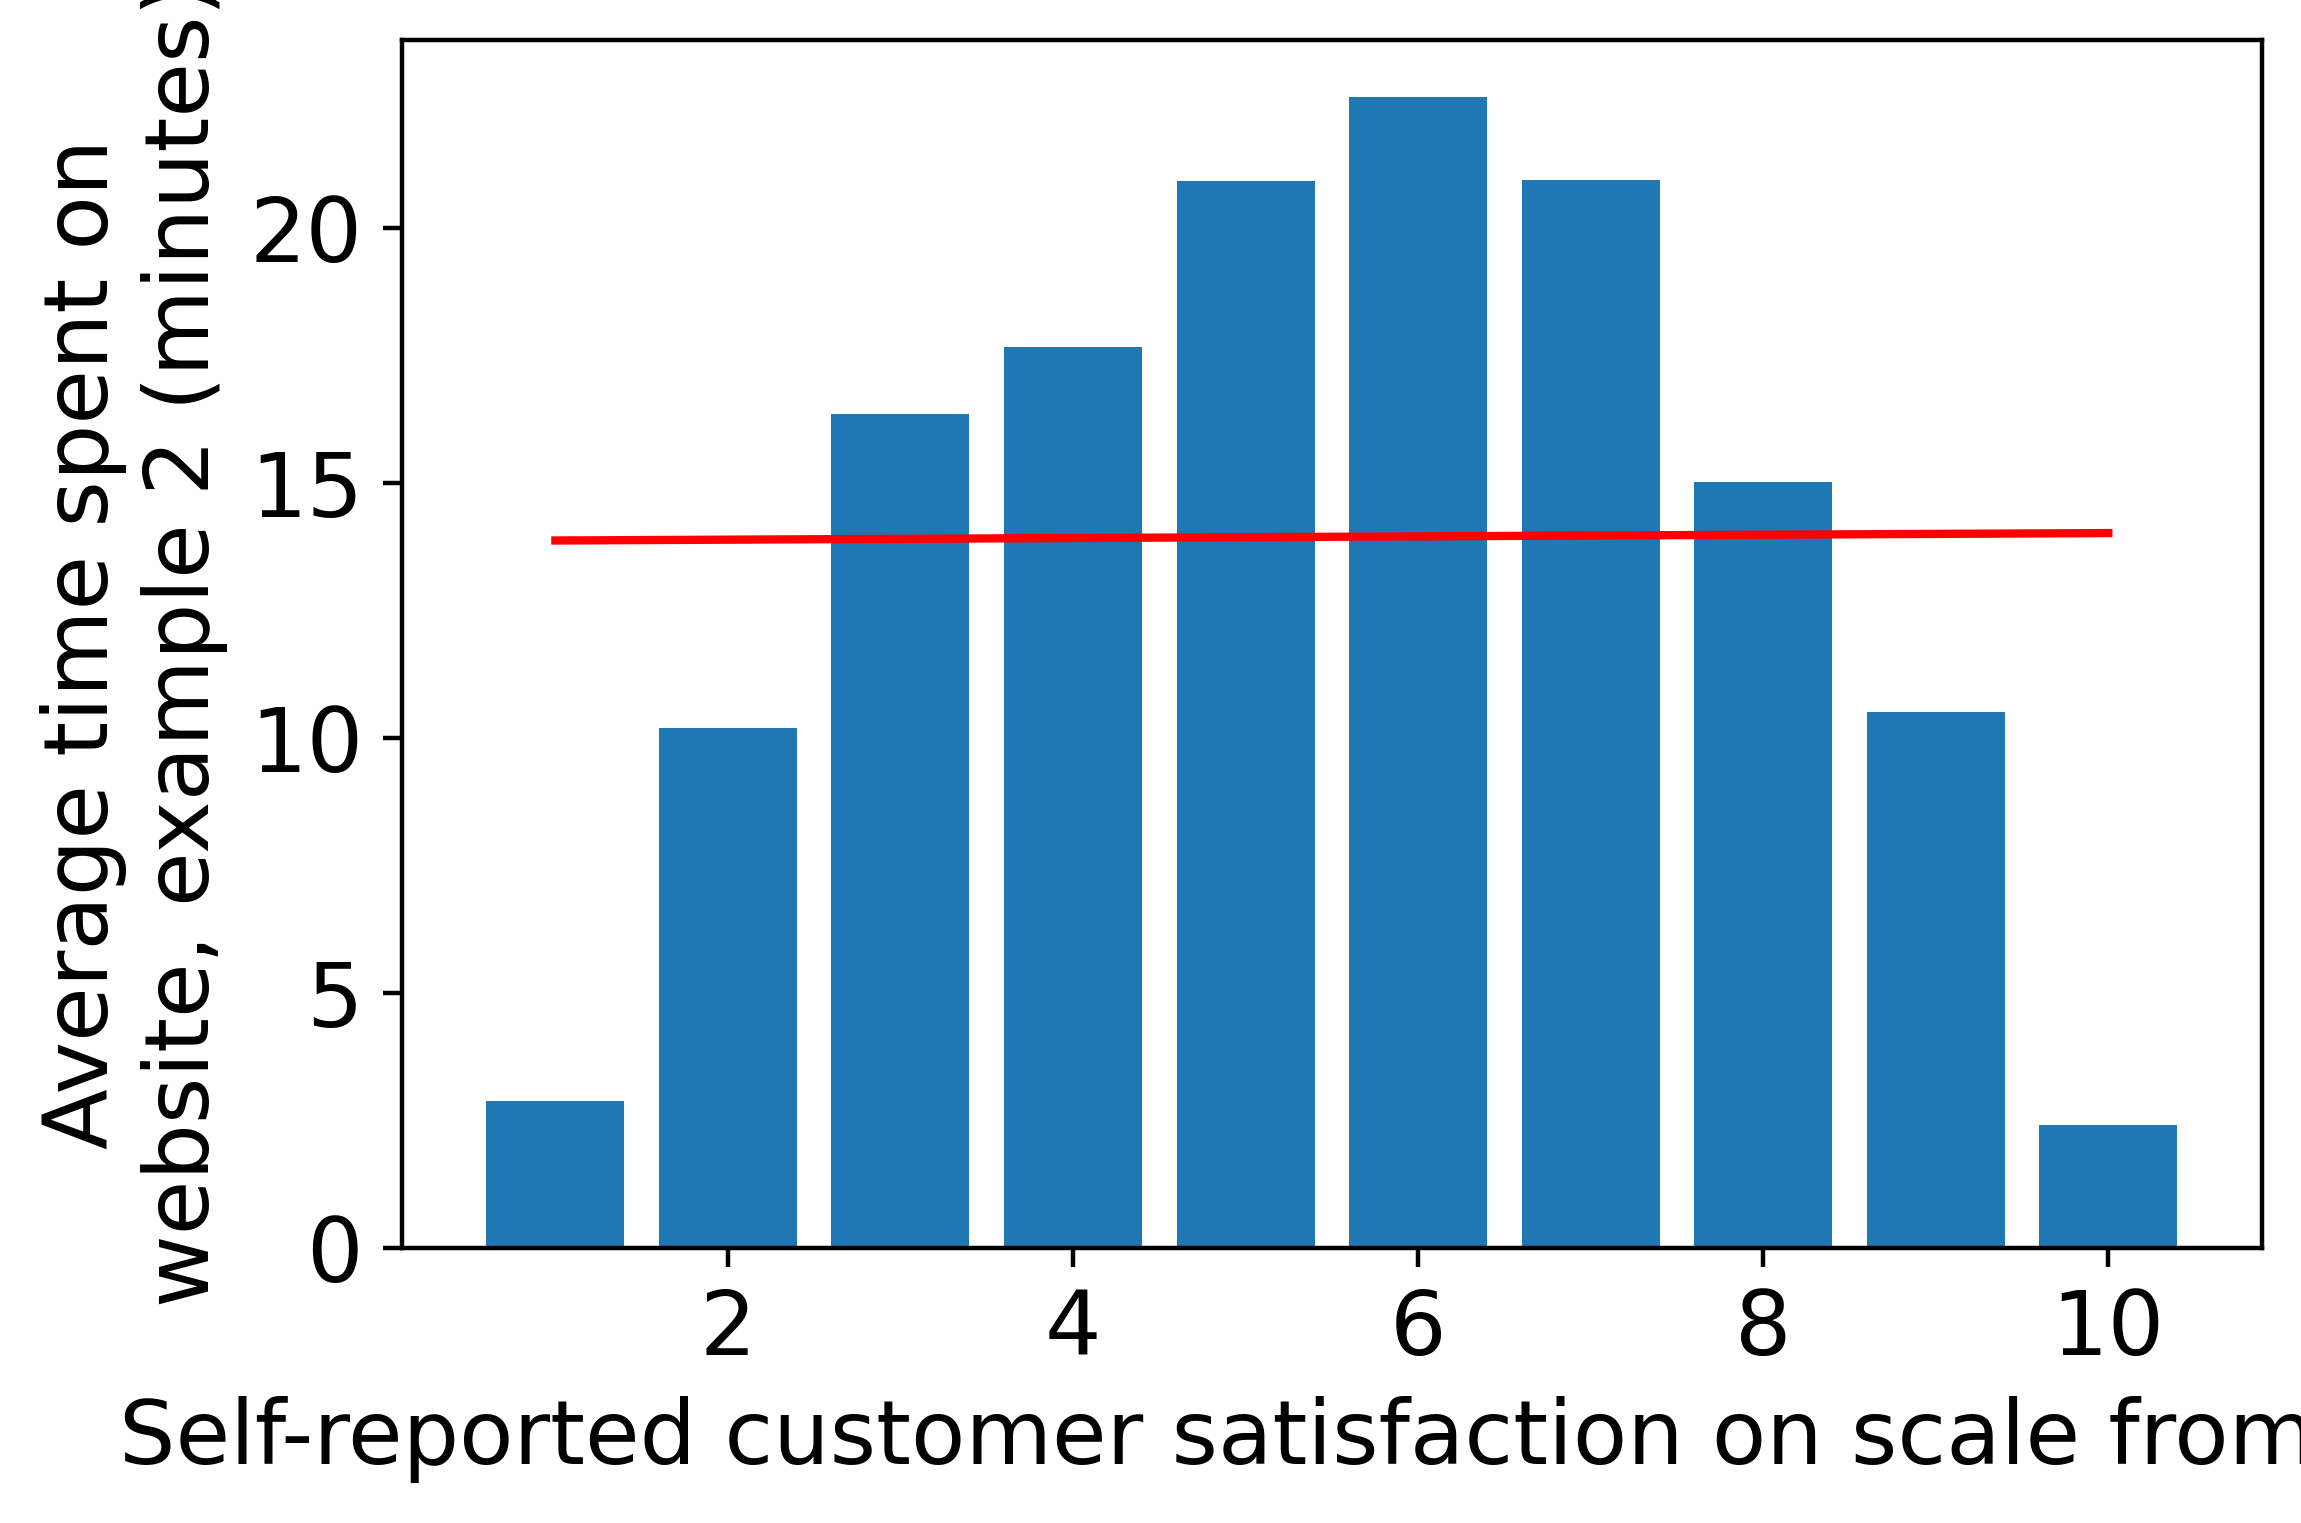

In [ ]:
plt.plot(X, intercept_poly + slope_poly*X, 'r-')
plt.bar(X,Y_poly,align='center')
plt.xlabel('Self-reported customer satisfaction on scale from 1-10')
plt.ylabel('Average time spent on\nwebsite, example 2 (minutes)')

This will group the data by the values in the EDUCATION feature and then within
each group aggregate the data together using the average of the default
payment next month response variable

In [ ]:
# df_clean_2.groupby('EDUCATION').agg({'default payment next month':'mean'})
df_clean_2.groupby("EDUCATION").agg({"default payment next month":"mean"})
# When grouping by one factor use this method

,default payment next month
EDUCATION,
1,0.193901
2,0.235913
3,0.255479
4,0.074879



# When grouping by Multiple factors use this one
df_gptest = df[['drive-wheels','body-style','price']]

grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()

grouped_test1


In [ ]:
gpa=df_clean_2.groupby("EDUCATION").mean()
gpa

,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
EDUCATION,,,,,,,,,,,,,,,,,,,,,
1,213725.031874,1.587973,1.651934,34.293986,-0.235444,-0.408840,-0.429664,-0.468551,-0.483744,-0.488207,...,42965.162665,40403.073098,38616.742350,6792.136953,7224.805461,6543.181683,5828.815342,5804.103166,6519.931577,0.193901
2,147275.646171,1.615669,1.520870,34.722427,0.101381,0.025124,-0.019425,-0.086370,-0.144485,-0.173302,...,44849.850538,41671.498395,40524.281586,5150.303339,5069.547359,4599.572002,4468.938273,4507.452561,4739.551132,0.235913
3,127013.168950,1.596804,1.420776,40.277626,0.132192,0.036986,0.003196,-0.071005,-0.143151,-0.186301,...,38860.994064,35959.926941,34766.610046,4875.064840,5067.630594,4052.852055,4038.314384,3685.232648,3816.066438,0.255479
4,180521.739130,1.632850,1.516908,36.106280,-0.241546,-0.442029,-0.480676,-0.490338,-0.514493,-0.623188,...,53742.949275,45058.806763,39539.915459,6403.108696,8360.871981,8701.258454,5037.698068,5386.072464,7415.053140,0.074879


Text(0.5, 0, 'Education level:ordinal encoding')

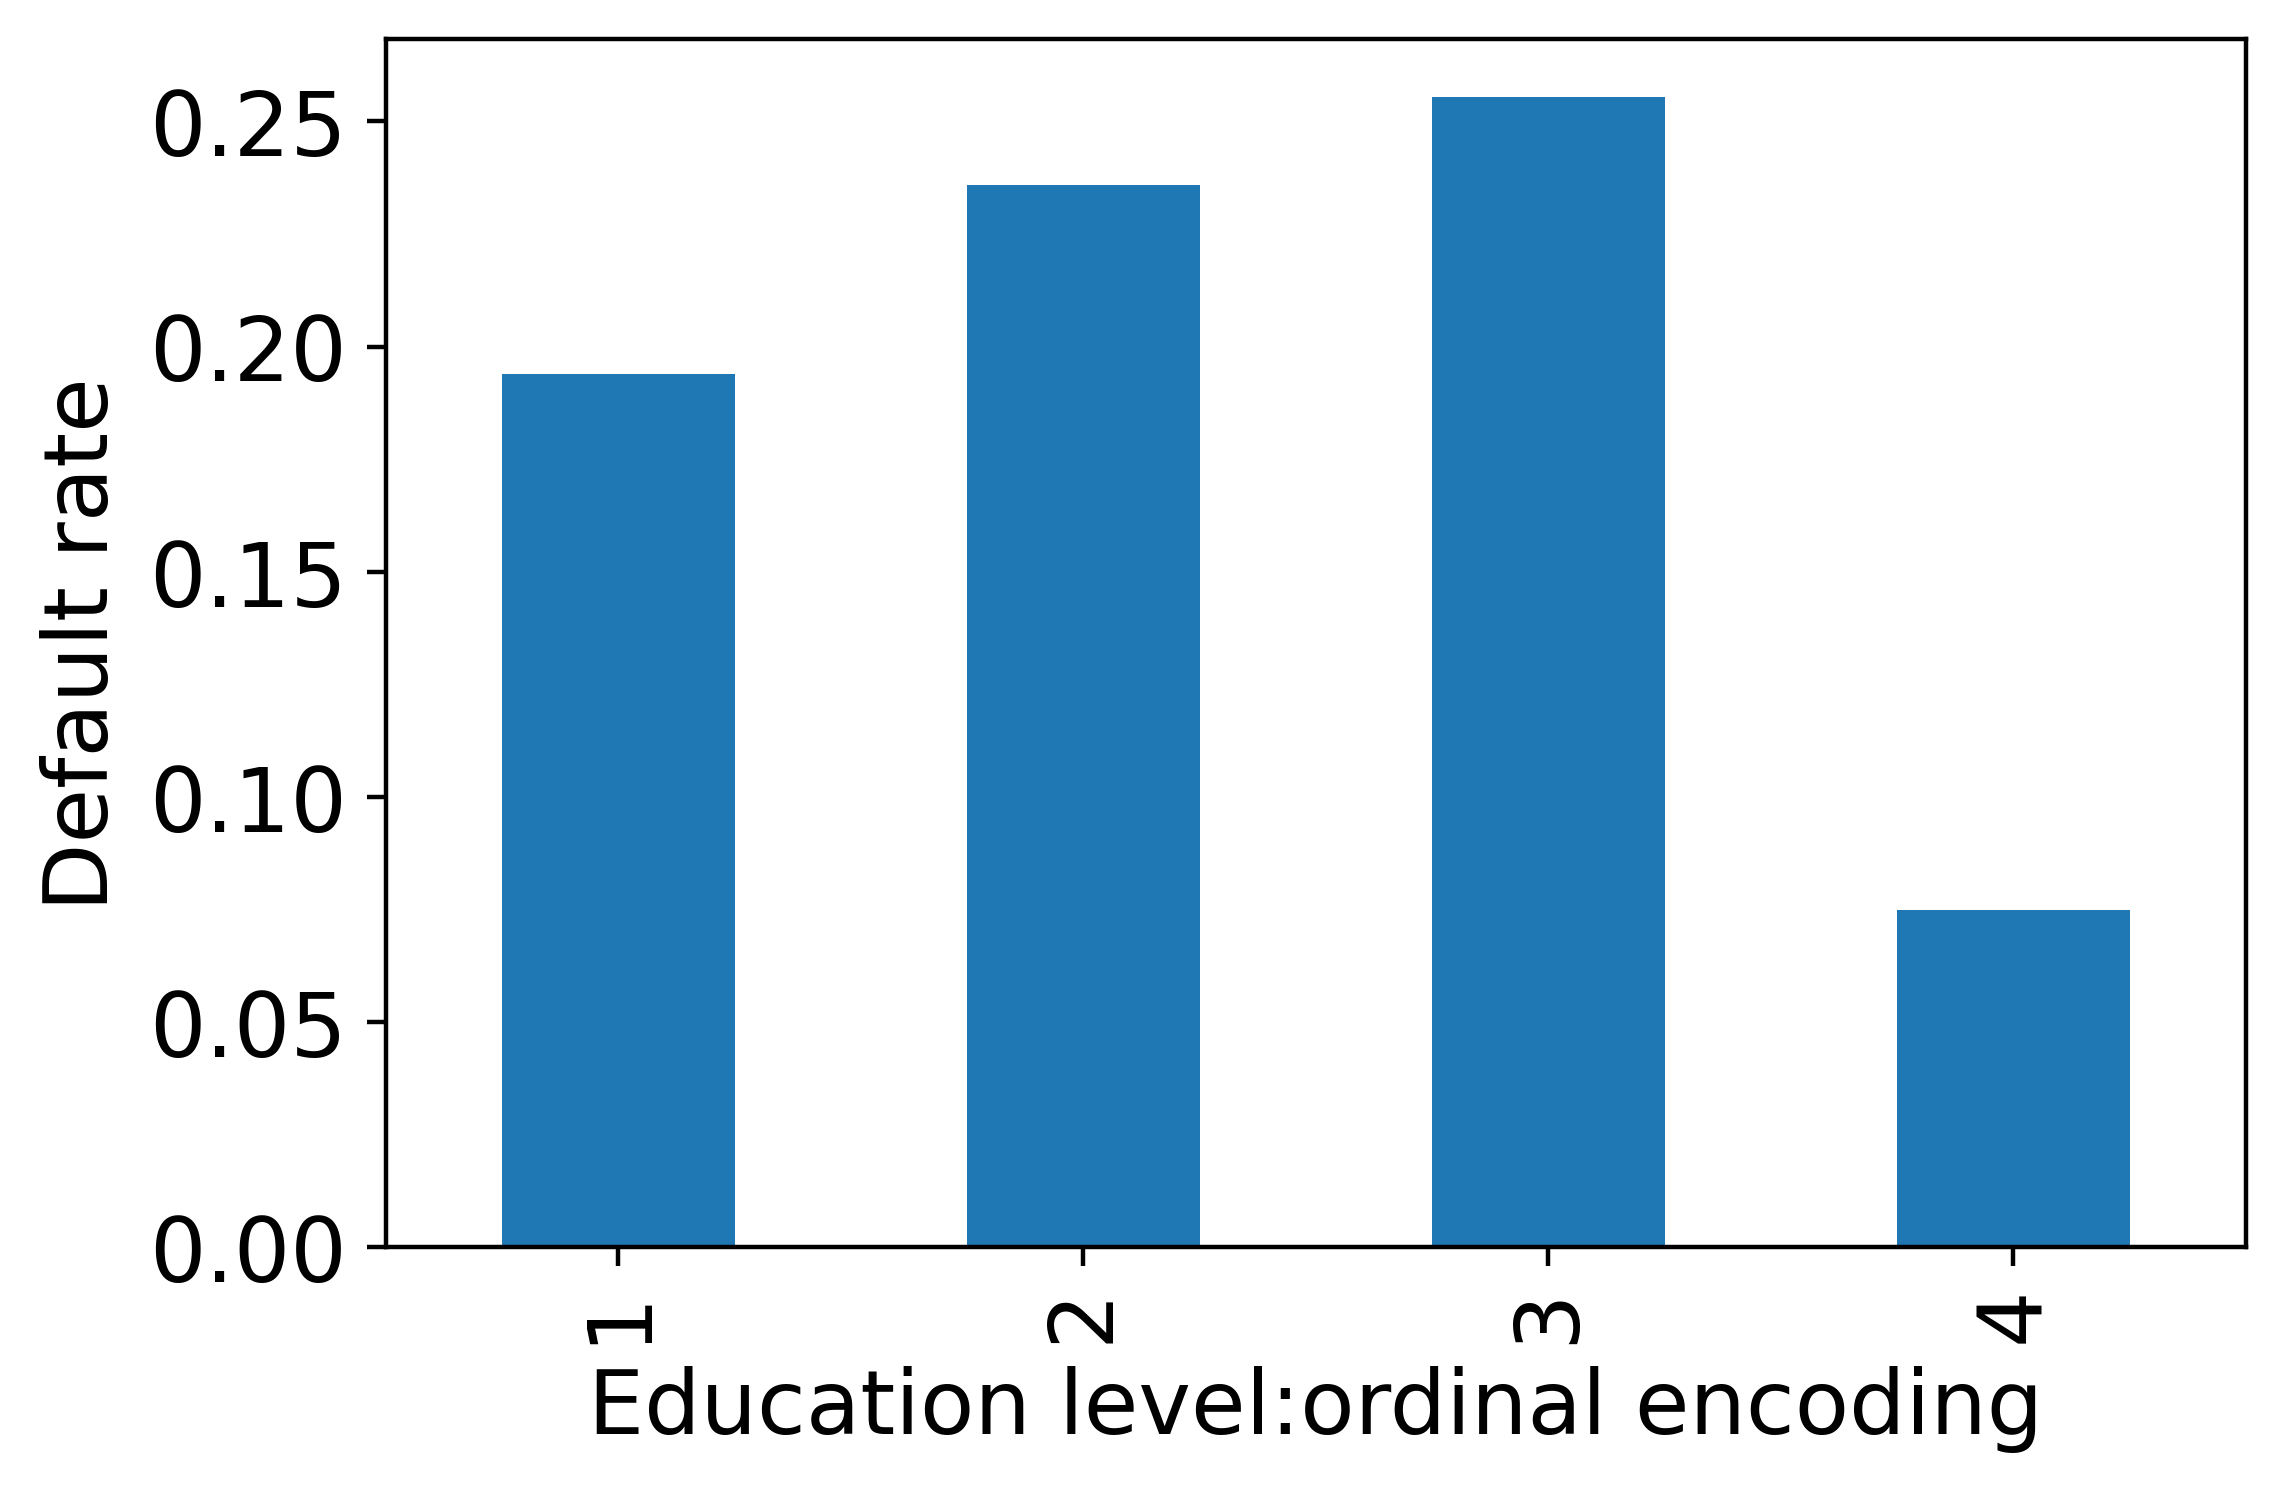

In [ ]:
# df_clean_2.groupby('EDUCATION').agg({'default payment next month':'mean'}).plot.bar(legend=False)
# plt.ylabel('Default rate')
# plt.xlabel('Education level: ordinal encoding')
df_clean_2.groupby("EDUCATION").agg({"default payment next month":"mean"}).plot.bar(legend=False)
plt.ylabel("Default rate")
plt.xlabel("Education level:ordinal encoding")

# Exercise 7: Implementing One-Hot Encoding for a Categorical Feature
# i.e. Converting from a long to a wide format

From the data dictionary, we know that 1 = graduate school, 2 = university, 3 = high
school, 4 = others. We would like to recreate a column that has these strings, instead
of numbers

In [ ]:
df_clean_2['EDUCATION'].head()

0    2
1    2
2    2
3    2
4    2
Name: EDUCATION, dtype: int64

Make a new column of categorical strings, using the data dictionary

key or column header is EDUCATION_CAT, value or rows are the `none` string

In [ ]:
# df_clean_2['EDUCATION_CAT'] = 'none'
df_clean_2["EDUCATION_CAT"]="none"
df_clean_2# 

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,none
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,none
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,none
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,none
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,ecff42d0-bdc6,220000,1,3,1,39,0,0,0,0,...,31237,15980,8500,20000,5003,3047,5000,1000,0,none
29996,99d1fa0e-222b,150000,1,3,2,43,-1,-1,-1,-1,...,5190,0,1837,3526,8998,129,0,0,0,none
29997,95cdd3e7-4f24,30000,1,2,2,37,4,3,2,-1,...,20582,19357,0,0,22000,4200,2000,3100,1,none
29998,00d03f02-04cd,80000,1,3,1,41,1,-1,0,0,...,11855,48944,85900,3409,1178,1926,52964,1804,1,none


In [ ]:
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


"Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)"

In [ ]:
cat_mapping={
    1:"graduate school",
    2:"university",
    3:"high school",
    4:"others"
}

In [ ]:
# df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)
df_clean_2["EDUCATION_CAT"]=df_clean_2["EDUCATION"].map(cat_mapping)

In [ ]:
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


In [ ]:
# edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'])
# edu_ohe.head(10)
edu_ohe=pd.get_dummies(df_clean_2["EDUCATION_CAT"])
edu_ohe.head(10)

,graduate school,high school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,1,0,0,0
6,1,0,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


In [ ]:
# df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis=1)
# df_with_ohe[['EDUCATION_CAT', 'graduate school',
#              'high school', 'university', 'others']].head(10)
df_with_ohe=pd.concat([df_clean_2,edu_ohe], axis=1)
df_with_ohe[["EDUCATION_CAT", "graduate school","high school","university","others"]].head(10)

,EDUCATION_CAT,graduate school,high school,university,others
0,university,0,0,1,0
1,university,0,0,1,0
2,university,0,0,1,0
3,university,0,0,1,0
4,university,0,0,1,0
5,graduate school,1,0,0,0
6,graduate school,1,0,0,0
7,university,0,0,1,0
8,high school,0,1,0,0
9,high school,0,1,0,0


pd.merge needs no specification for either row wise or column wise

Save the fruits of your exploratory labors

In [ ]:
df_with_ohe.to_excel('default_credit_card_wide-view.xlsx', index=False)

In [ ]:
df_with_ohe.to_csv('default_credit_card_wide-view.csv', index = False)

# Exploring the Financial History Features in the Dataset

In [ ]:
# df = pd.read_csv('../../../Data/Chapter_1_cleaned_data.csv')

In [ ]:
df=df_with_ohe

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')

In [ ]:
df.shape

(26664, 30)

In [ ]:
pay_feats = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [ ]:
# df[pay_feats].describe()
df[pay_feats].describe(include="all")

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [ ]:
# df[pay_feats[0]].value_counts().sort_index()
df[pay_feats[0]].value_counts().sort_index()#gives the sorted values in PAY_1

-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: PAY_1, dtype: int64

In [ ]:
pay_feats[0]

'PAY_1'

<AxesSubplot: >

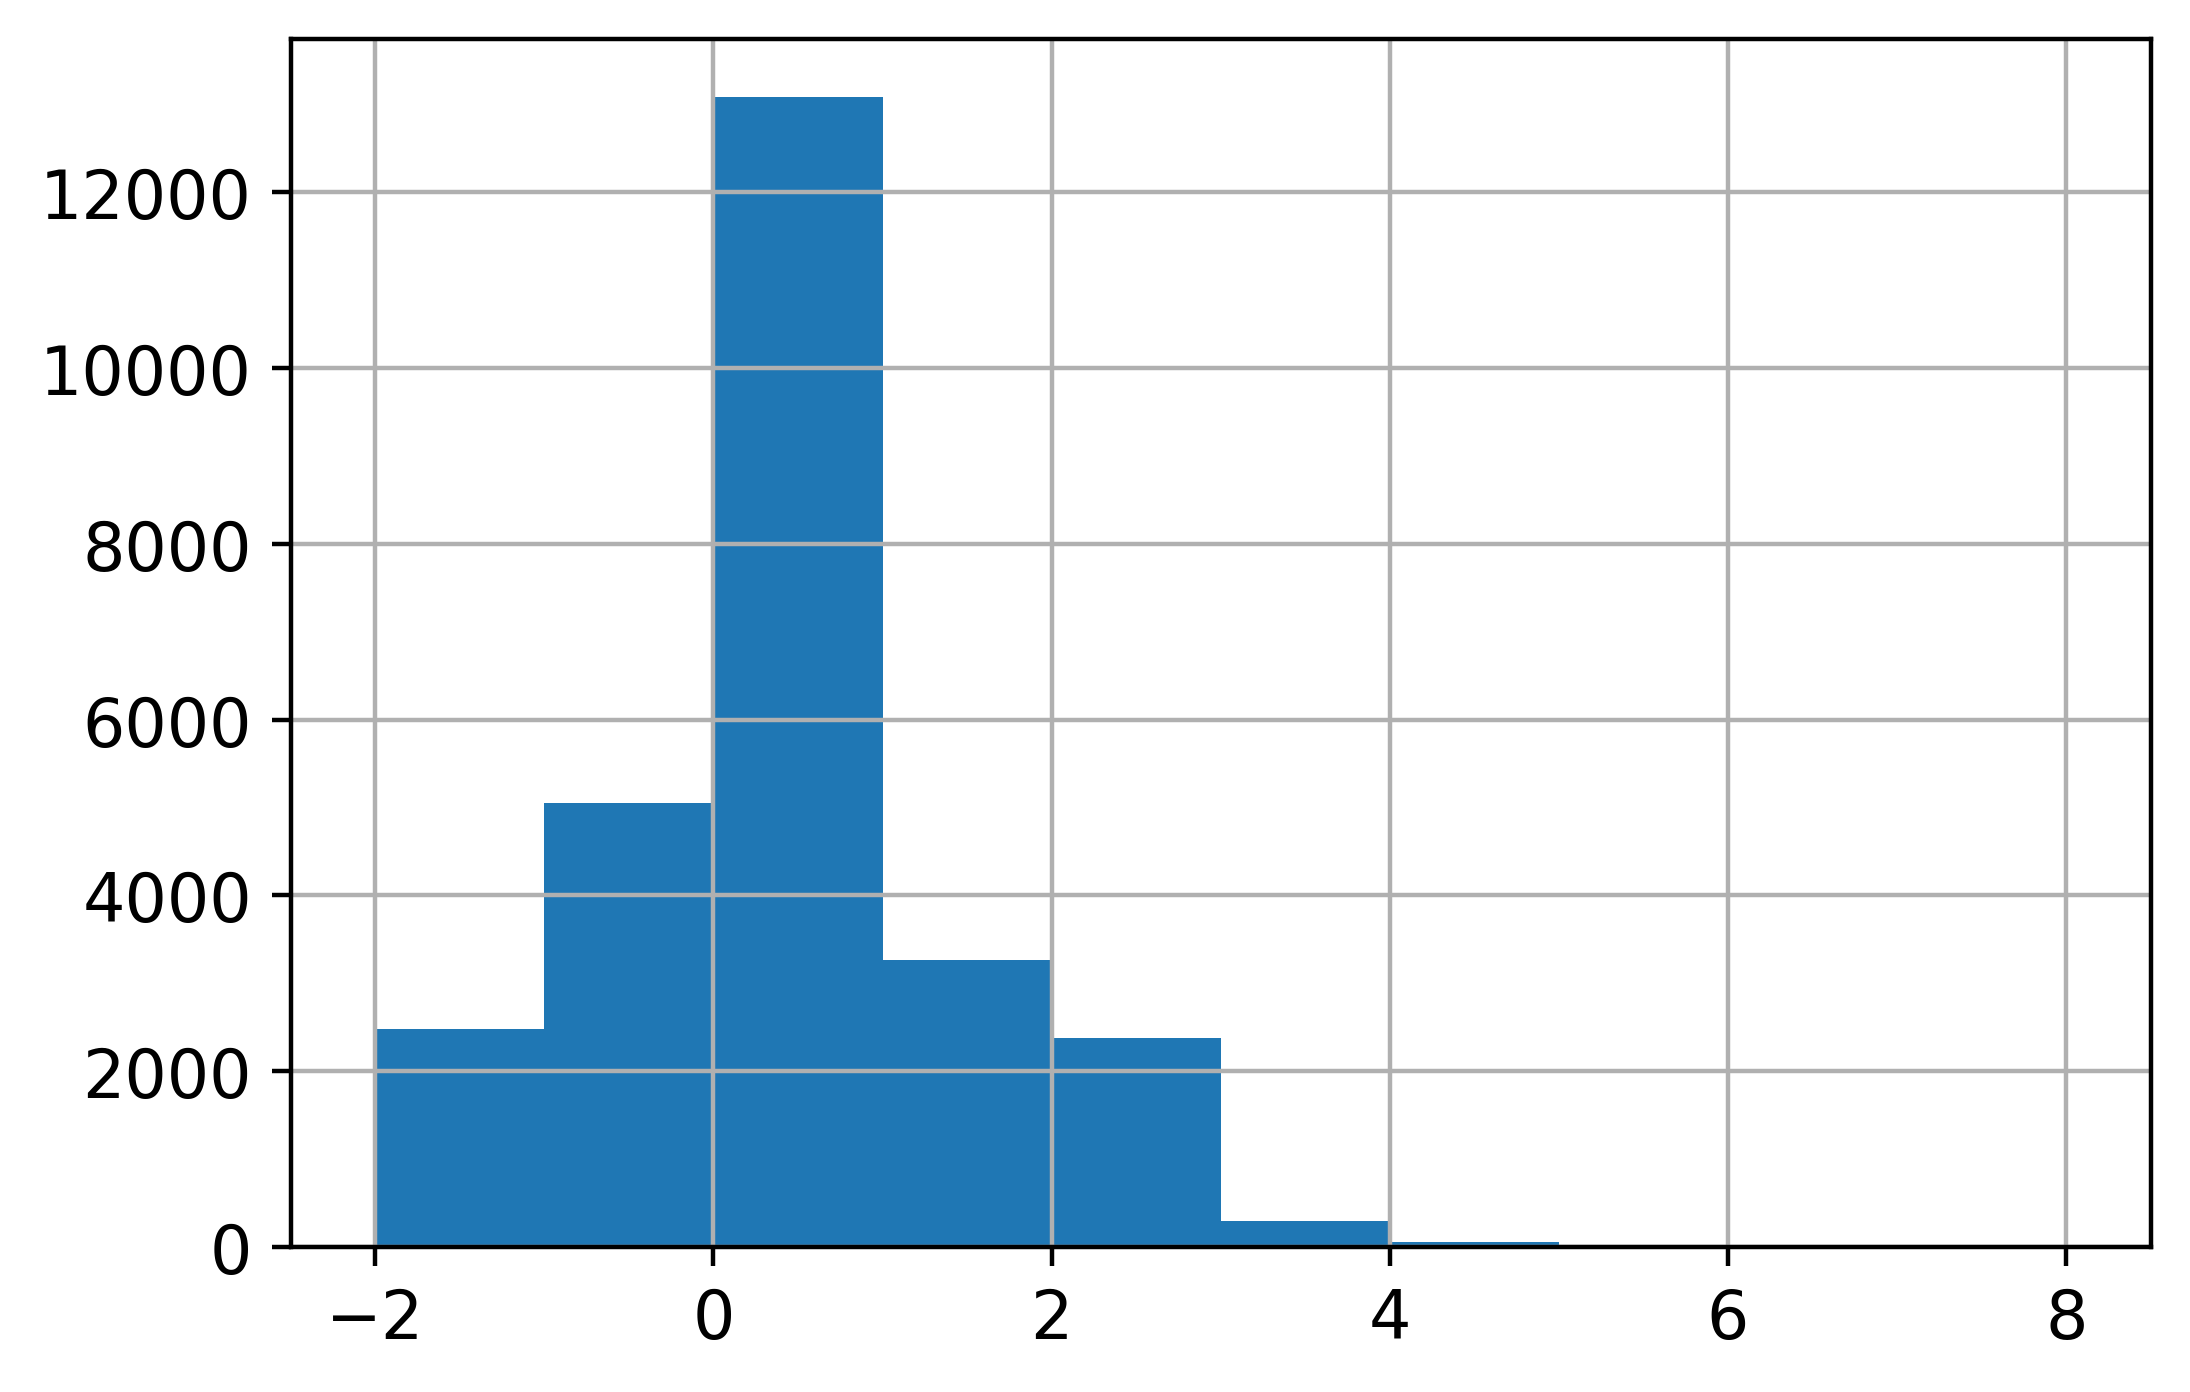

In [ ]:
mpl.rcParams['figure.dpi'] = 400
mpl.rcParams['font.size'] = 12
df[pay_feats[0]].hist()
#rcParams help with formatting how the graph would look like instead of seaborn
#while pyplot just plots the graph

The number
of bins is the number of vertical bars that make up the discrete histogram plot we
see.

In [ ]:
pay_1_bins=np.array(range(-2,10))-0.5 #separate the range by -0.5 
pay_1_bins

array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,
        8.5])

Text(0, 0.5, 'Number of accounts')

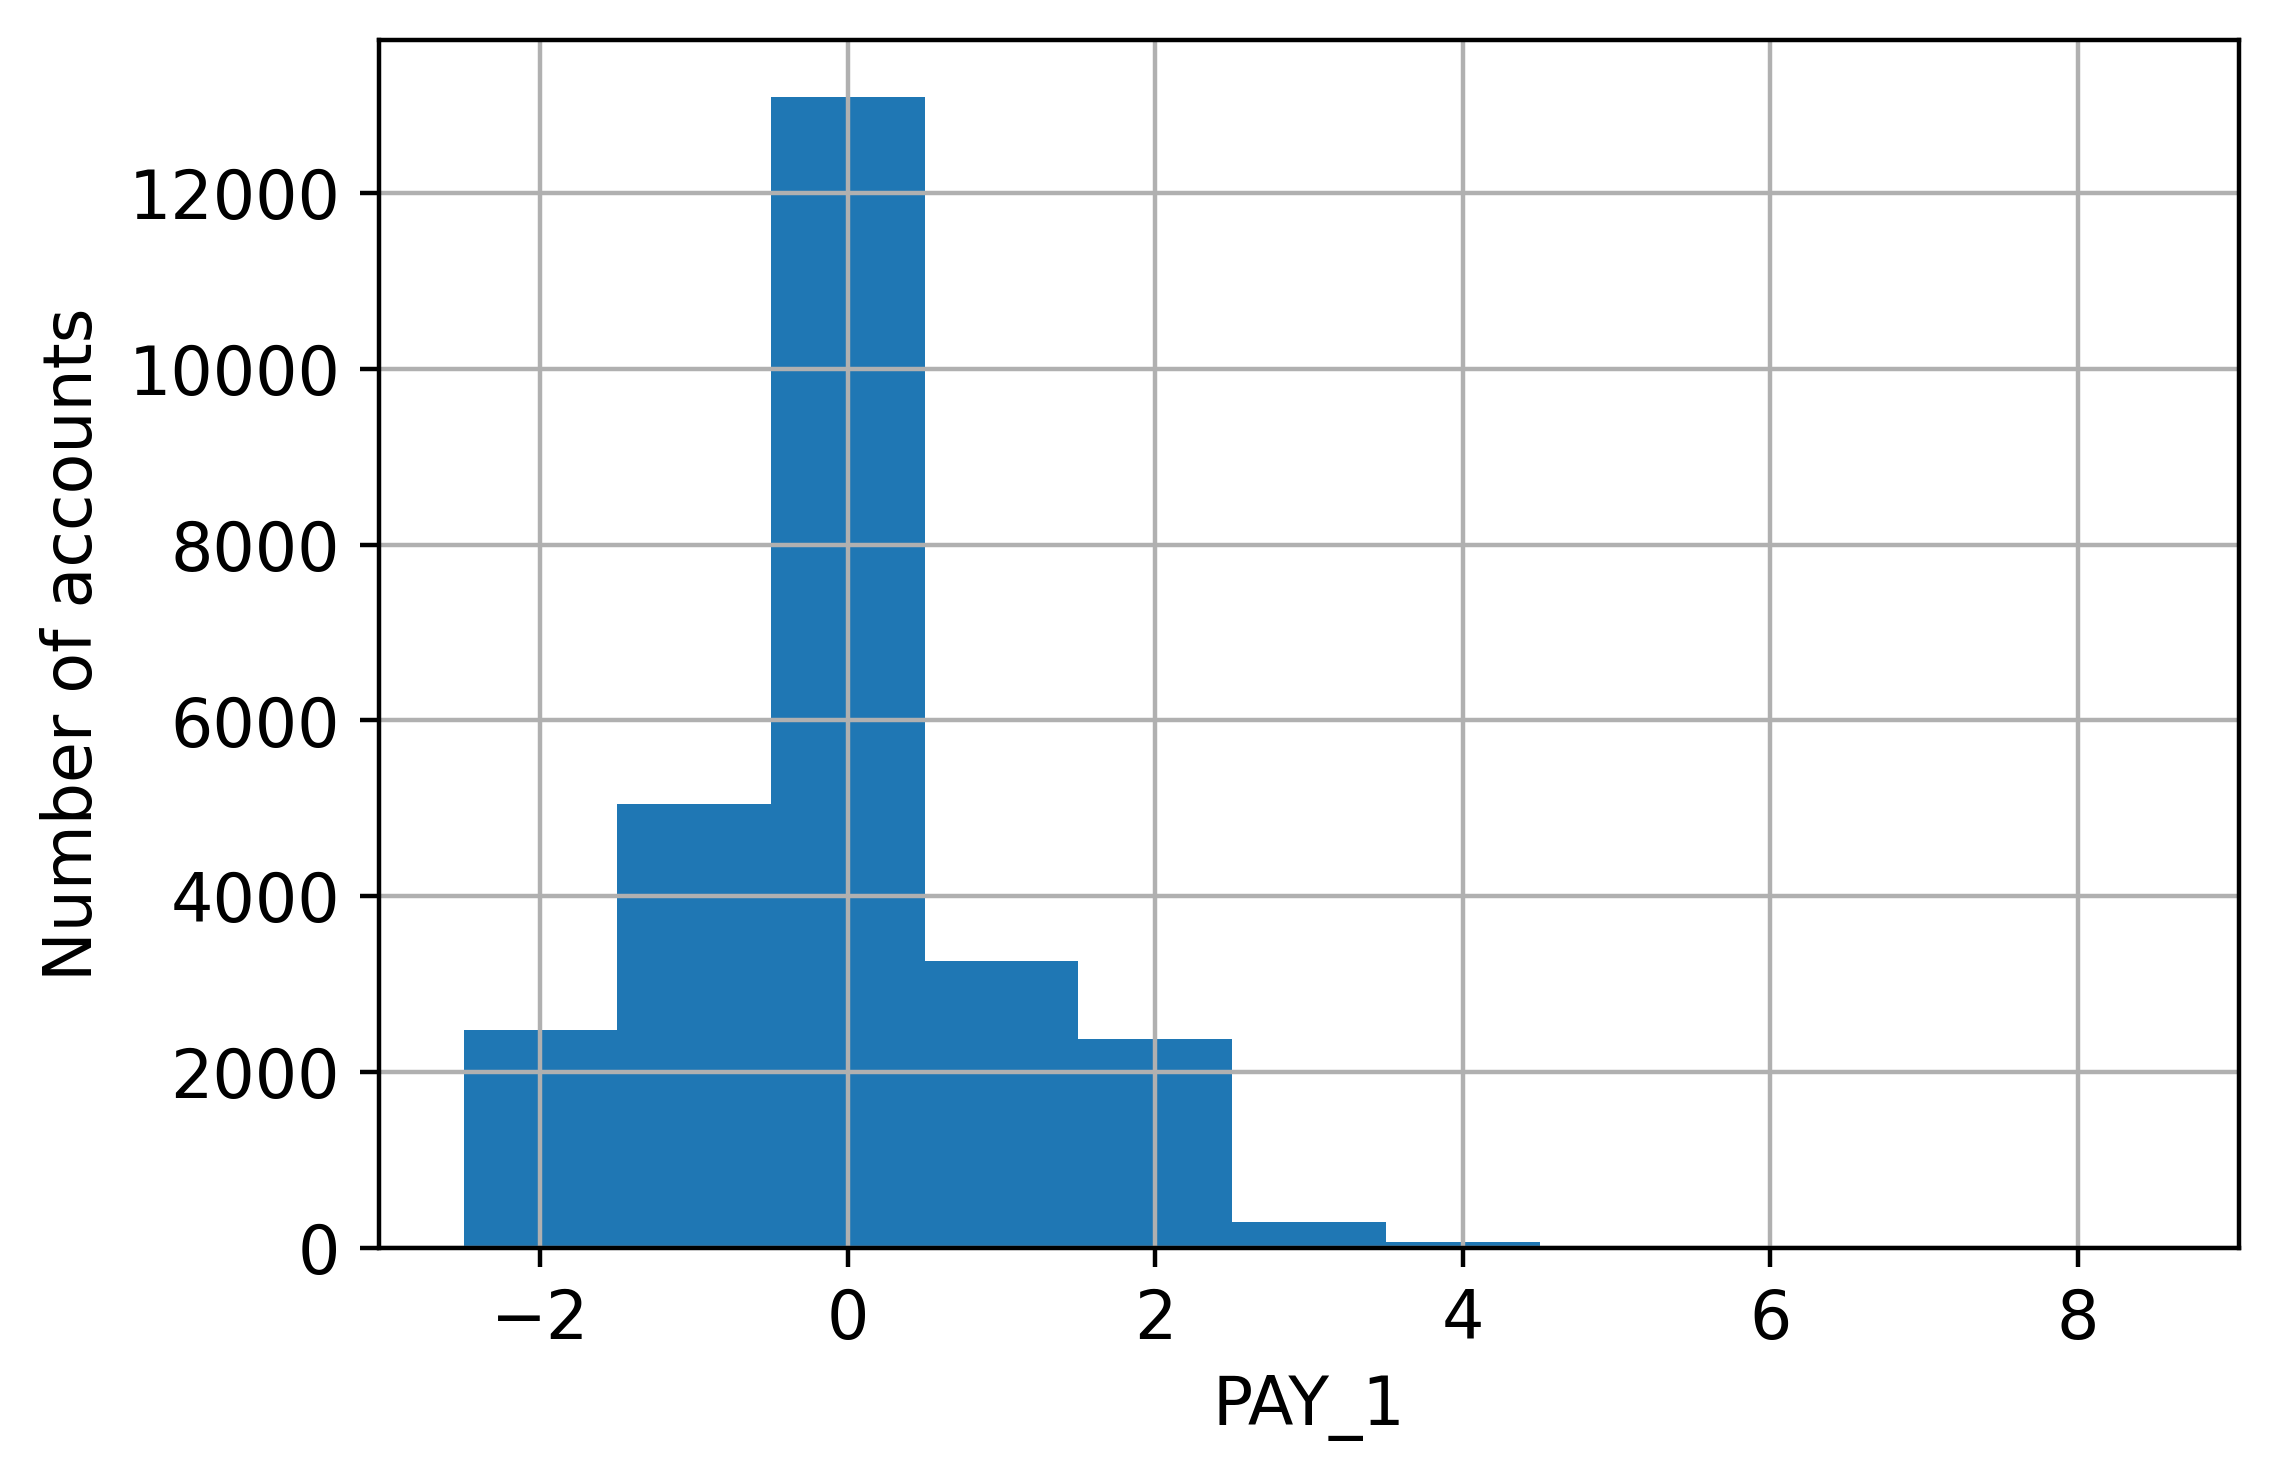

In [ ]:
df[pay_feats[0]].hist(bins=pay_1_bins)
plt.xlabel("PAY_1")
plt.ylabel("Number of accounts")

As we can see above
Compared to the positive integer values, most of the values are either -2, -1, or 0,
which correspond to an account that was in good standing last month: not used, paid
in full, or made at least the minimum payment.

In [ ]:
for feat in pay_feats:
    print(df[feat].value_counts().sort_index())
    #prints all the value_counts in all the PAY AMOUNTS

-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: PAY_1, dtype: int64
-2     3375
-1     5368
 0    13961
 1       24
 2     3509
 3      289
 4       85
 5       24
 6       11
 7       17
 8        1
Name: PAY_2, dtype: int64
-2     3654
-1     5290
 0    13968
 1        3
 2     3400
 3      214
 4       69
 5       20
 6       19
 7       24
 8        3
Name: PAY_3, dtype: int64
-2     3893
-1     5070
 0    14596
 1        2
 2     2798
 3      161
 4       57
 5       30
 6        4
 7       51
 8        2
Name: PAY_4, dtype: int64
-2     4056
-1     4949
 0    15032
 2     2335
 3      151
 4       71
 5       14
 6        2
 7       53
 8        1
Name: PAY_5, dtype: int64
-2     4366
-1     5138
 0    14416
 2     2476
 3      156
 4       43
 5       10
 6       15
 7       42
 8        2
Name: PAY_6, dtype: int64


array([[<AxesSubplot: title={'center': 'PAY_1'}>,
        <AxesSubplot: title={'center': 'PAY_2'}>,
        <AxesSubplot: title={'center': 'PAY_3'}>],
       [<AxesSubplot: title={'center': 'PAY_4'}>,
        <AxesSubplot: title={'center': 'PAY_5'}>,
        <AxesSubplot: title={'center': 'PAY_6'}>]], dtype=object)

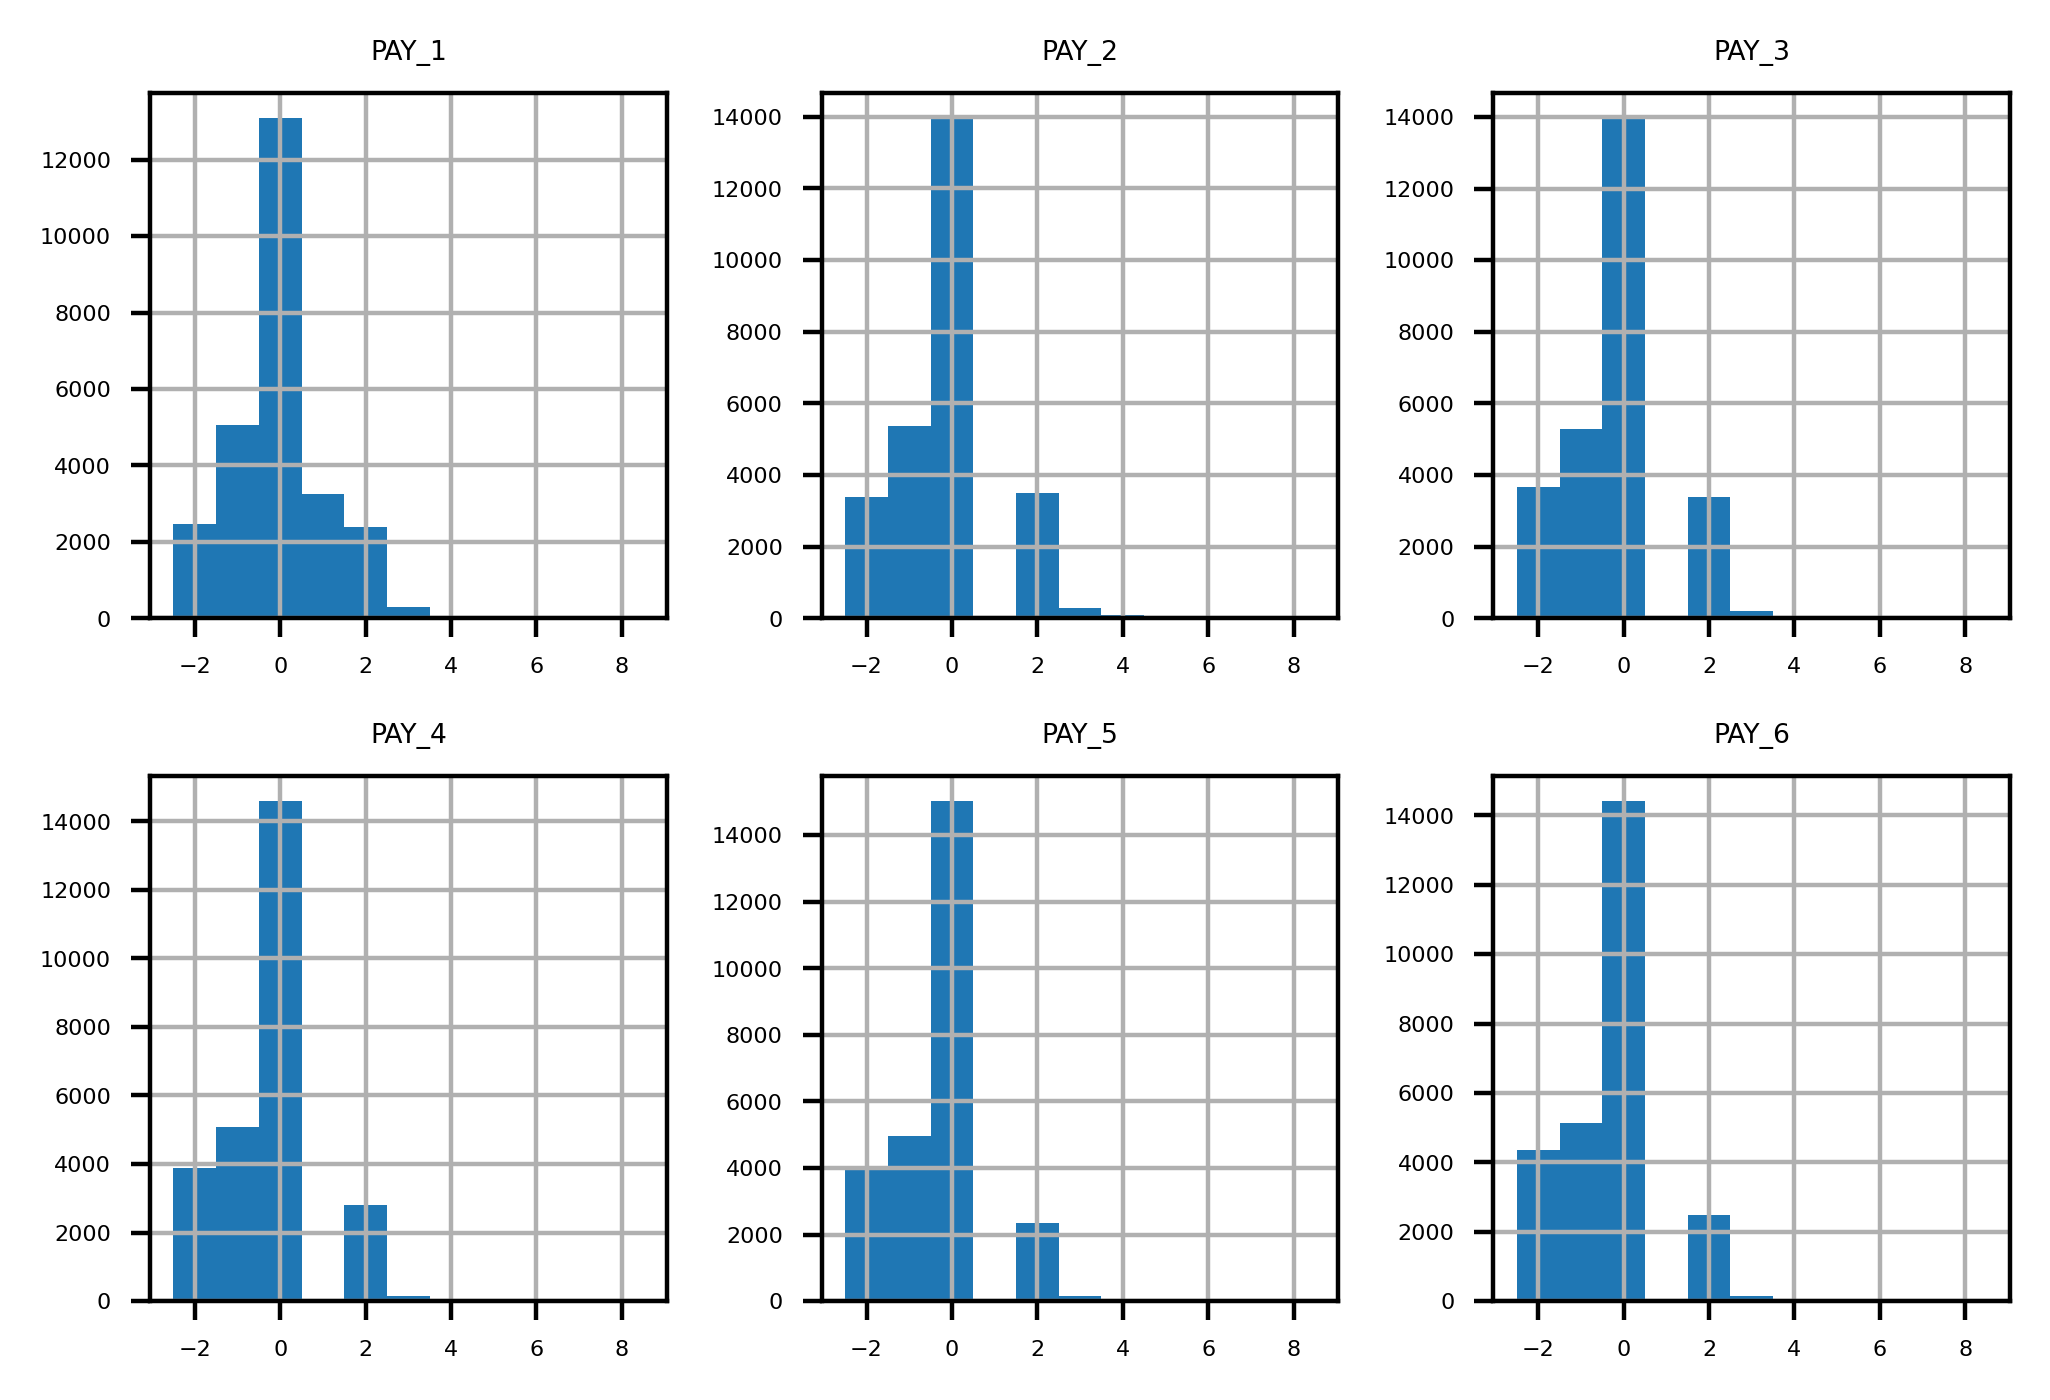

In [ ]:
# mpl.rcParams['font.size'] = 4
# # df[pay_feats].hist(bins=pay_1_bins, layout=(2,3))# 2 BY 3 GRID OF PLOTS
mpl.rcParams["font.size"]=4
df[pay_feats].hist(bins=pay_1_bins, layout=(2,3))

Did you notice that something doesn't seem right? Consider the values between July(PAY_3) and August (PAY_2).
In July, there are very few accounts that had a 1-month payment delay; <b>this bar is not really visible in the histogram.</b> 

However, in August,there are suddenly thousands of accounts with a 2-month payment delay. 

This does not make sense: <b>the number of accounts with a 2-month delay in a given month should be less than or equal to the number of accounts with a 1-month delay in the previous month.</b>

In Essence the <b>3400(2)</b> in PAY_2 should be less than <b>24(1)</b> in PAY_1, but it is not so we have a problem

In [ ]:
df['PAY_2'][df['PAY_2']==2]

0        2
1        2
13       2
15       2
50       2
        ..
29974    2
29976    2
29981    2
29991    2
29994    2
Name: PAY_2, Length: 3509, dtype: int64

Let's take a closer look at accounts with a 2-month delay in August and see what the
payment status was in July. We can do this with the following code, using a Boolean
mask and .loc, as shown in the following snippet:

In [ ]:
df.loc[df['PAY_2']==2, ['PAY_2', 'PAY_3']].head(6)
# Payment status in July(PAY_3) of accounts with a 2-month payment delay in August AND SEE WHAT THE PAYMENT STATUS WAS, IN JULY
# There really is a problem


,PAY_2,PAY_3
0,2,-1
1,2,0
13,2,2
15,2,0
50,2,2
53,2,0


it's clear that accounts with a 2-month delay in August have nonsensical values for the July payment status. 
The only way to progress to a 2-month delay should be from a 1-month delay the previous month, yet none of these accounts indicate that.

When you see something like this in the data, you need to either check the logic in the query used to create the dataset or contact the person who gave you the dataset.

After double-checking these results, for example using .value_counts() to view the numbers directly, we contact our client to inquire about this issue.

In [ ]:
df["PAY_1"].value_counts().sort_index()

-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: PAY_1, dtype: int64

In [ ]:
df["PAY_2"].value_counts().sort_index()

-2     3375
-1     5368
 0    13961
 1       24
 2     3509
 3      289
 4       85
 5       24
 6       11
 7       17
 8        1
Name: PAY_2, dtype: int64

Figure ABOVE: Payment status in July (PAY_3) of accounts with a 2-month payment
delay in August (PAY_2)

In [ ]:
df["PAY_3"].value_counts().sort_index()

When you see something like this in the data, you need to either check the logic in the query used to create the dataset or contact the person who gave you the dataset.

After double-checking these results, for example using .value_counts() to view the numbers directly, we contact our client to inquire about this issue.

The client lets us know that they had been having problems with pulling the most recent month of data, leading to faulty reporting for accounts that had a 1-month delay in payment.

In September, they had mostly fixed these problems (although not entirely; that is why there were missing values in the PAY_1 feature, as we found). 

So, in our dataset, the value of 1 is underreported in all months except for
September (the PAY_1 feature)

Because of this, only the most recent month of our payment status data is correct.

This means that, of all the payment status features, only PAY_1 is representative of future data, those that will be used to make predictions with the model we develop.

This is a key point: a predictive model relies on getting the same kind of data to make predictions as it was built with. This means we can use PAY_1 as a feature in our model, but not PAY_2 or the other payment status features from previous months.

# Activity 1: Exploring Remaining Financial Features in the Dataset

In order to better visualize some of this data, we'll use a mathematical function that should be familiar: the
logarithm. 

You'll use pandas' apply method, which serves to apply any functionto an entire column or DataFrame in the process.

Once you complete the activity, you should have the following set of histograms of logarithmic transformations of non-zero payments:

In [ ]:
# bill_feats = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
# pay_amt_feats = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
bill_feats=["BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6"]
pay_amt_feats=["PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]

In [ ]:
df[bill_feats].describe()
#Use .describe() to examine statistical summaries of the bill amount features. Reflect on what you see. Does it make sense?

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,51405.730723,49300.001500,47026.340047,43338.894539,40338.136701,38889.872337
std,73633.687106,70934.549534,68705.359524,64275.250740,60705.944083,59432.541657
min,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000
25%,3580.000000,2999.750000,2627.250000,2341.750000,1745.000000,1256.000000
50%,22361.000000,21150.000000,20079.500000,19037.000000,18066.000000,17005.000000
75%,67649.750000,64395.500000,60360.000000,54727.500000,50290.500000,49253.750000
max,746814.000000,671563.000000,855086.000000,706864.000000,823540.000000,699944.000000


array([[<AxesSubplot: title={'center': 'BILL_AMT1'}>,
        <AxesSubplot: title={'center': 'BILL_AMT2'}>,
        <AxesSubplot: title={'center': 'BILL_AMT3'}>],
       [<AxesSubplot: title={'center': 'BILL_AMT4'}>,
        <AxesSubplot: title={'center': 'BILL_AMT5'}>,
        <AxesSubplot: title={'center': 'BILL_AMT6'}>]], dtype=object)

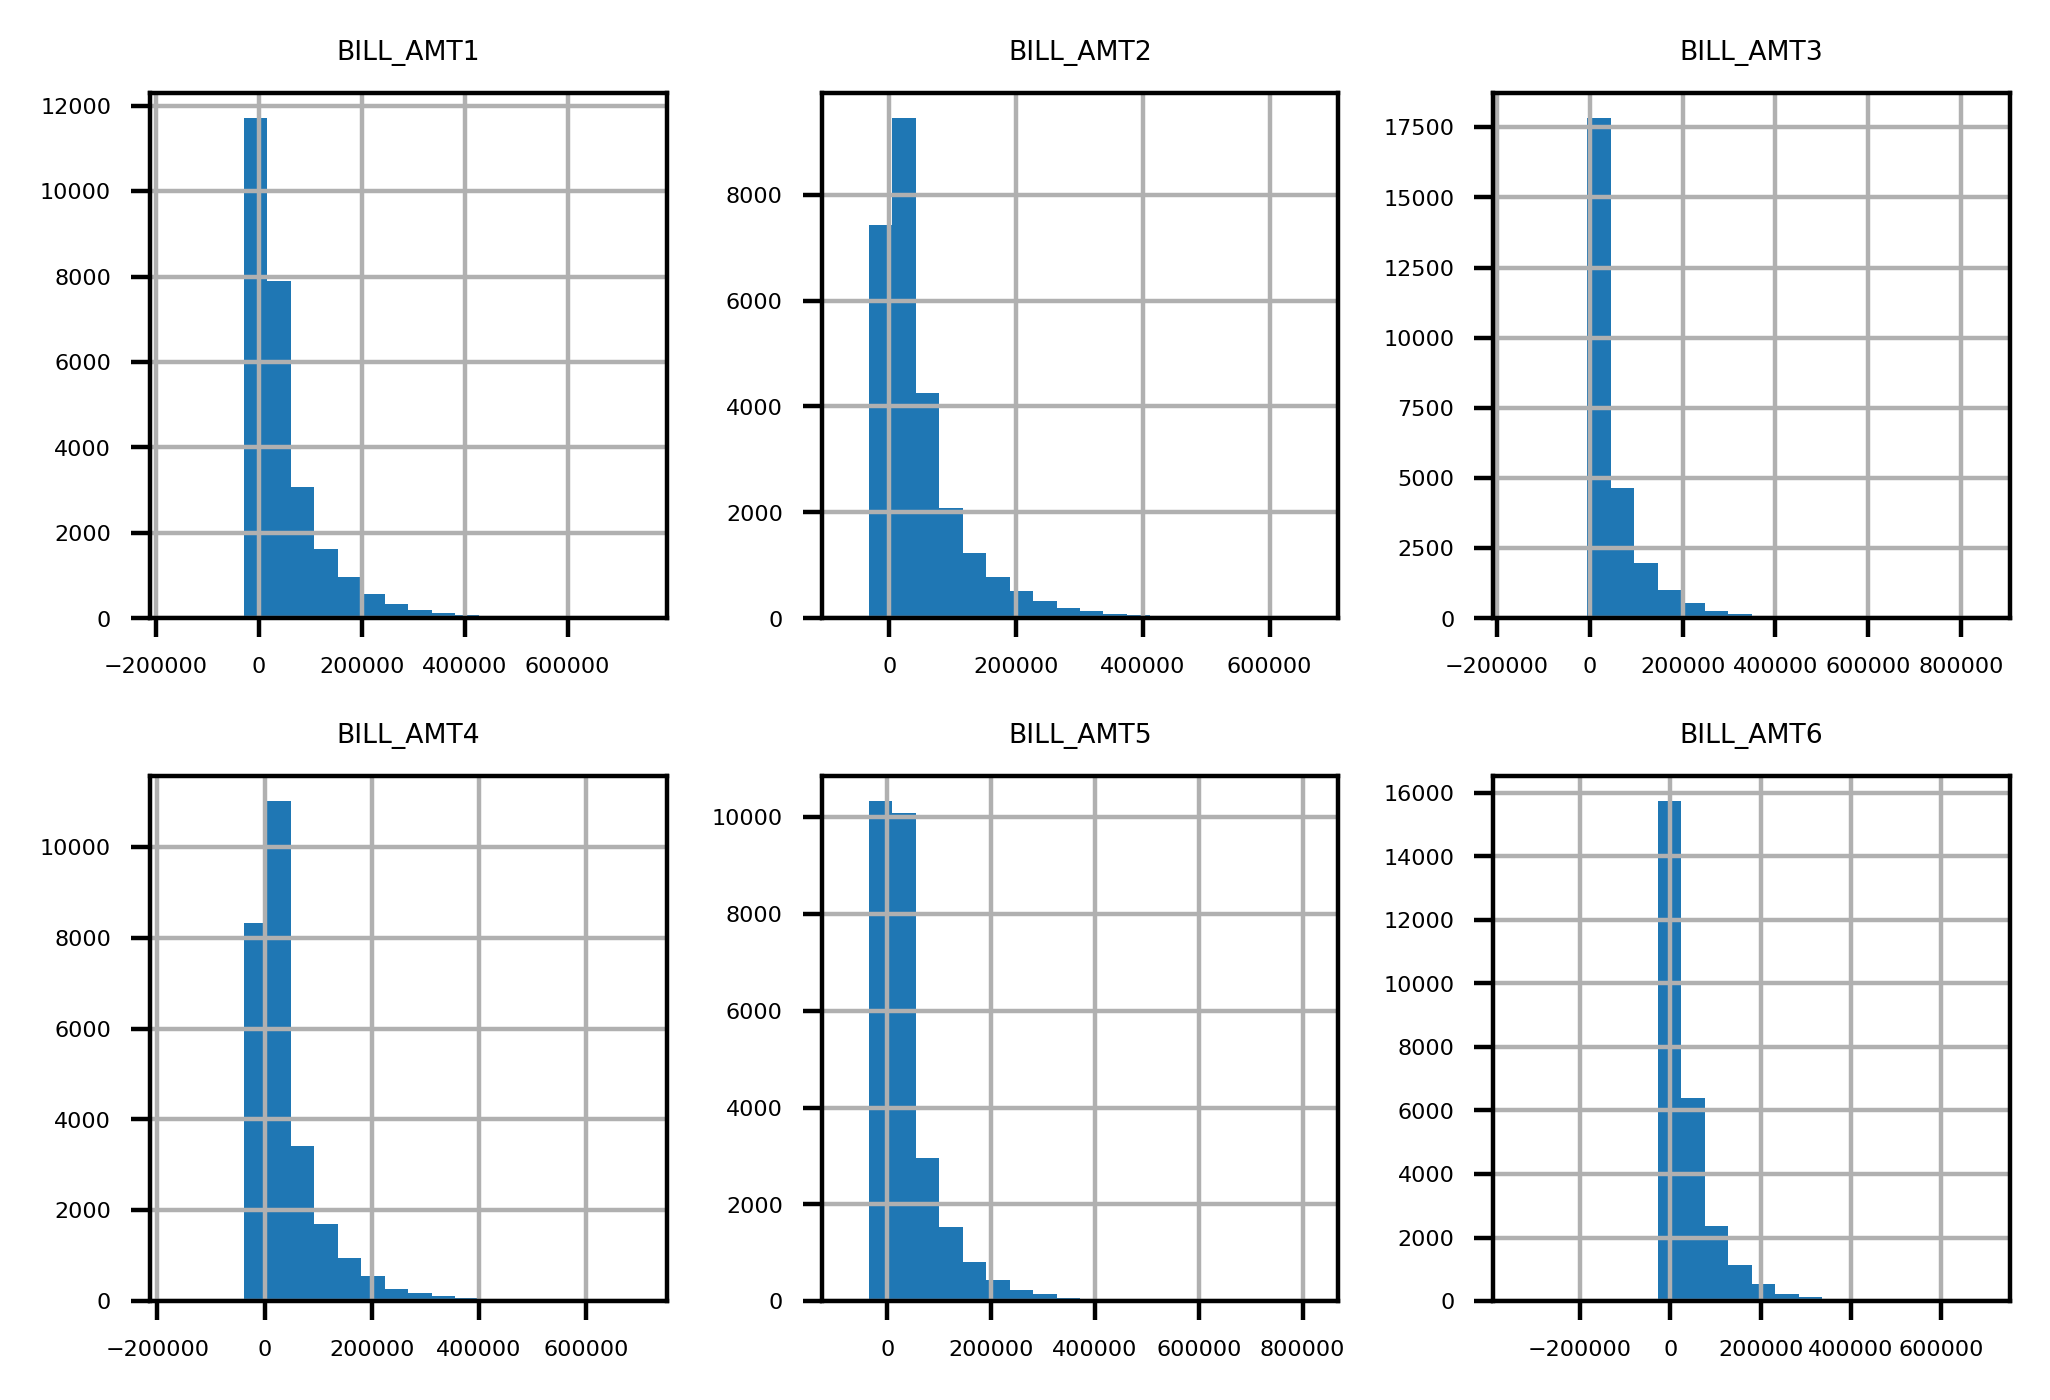

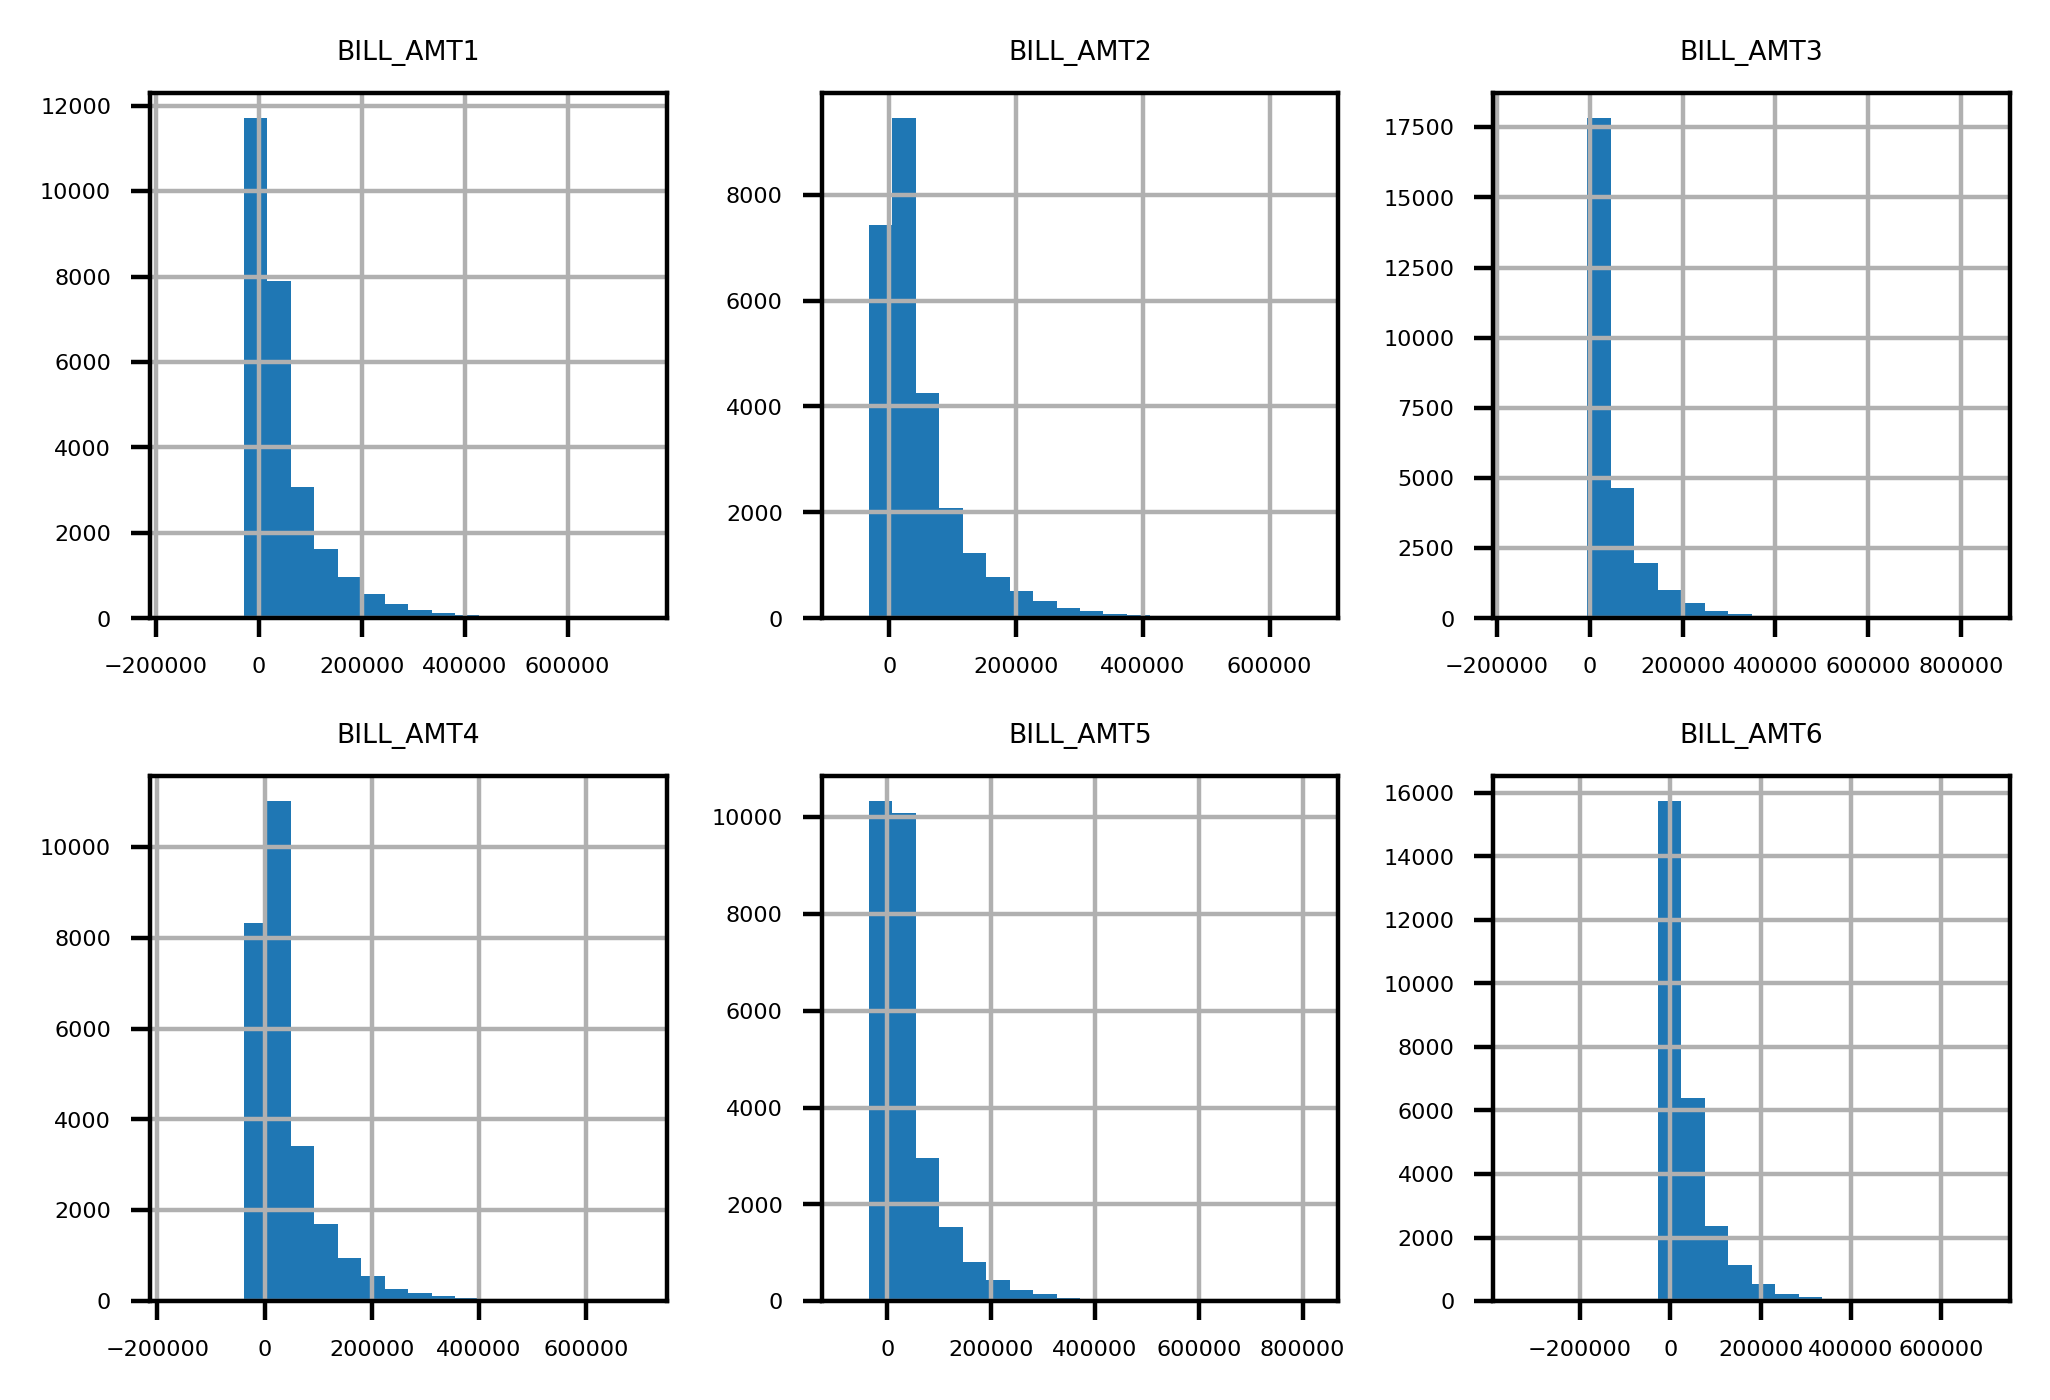

In [ ]:
df[bill_feats].hist(bins=20, layout=(2,3))
df[bill_feats].hist(bins=20, layout=(2,3))
#Visualize the bill amount features using a 2 by 3 grid of histogram plots.
#Hint: You can use 20 bins for this visualization.

In [ ]:
df[pay_amt_feats].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,26664.000000,2.666400e+04,26664.000000,26664.000000,26664.000000,26664.000000
mean,5704.085771,5.881110e+03,5259.514964,4887.048717,4843.729973,5257.843047
std,16699.398632,2.121431e+04,17265.439561,15956.349371,15311.721795,17635.468185
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.020000e+02,390.000000,294.750000,242.750000,111.000000
50%,2114.500000,2.007000e+03,1822.000000,1500.000000,1500.000000,1500.000000
75%,5027.000000,5.000000e+03,4556.250000,4050.500000,4082.750000,4015.000000
max,873552.000000,1.227082e+06,889043.000000,621000.000000,426529.000000,528666.000000


Plot a histogram of the bill payment features similar to the bill amount features, but also apply some rotation to the x-axis labels with the xrot keyword argument so that they don't overlap. 

In any plotting function, you can include the xrot=<angle> keyword argument to rotate x-axis labels by a given angle in
degrees.
    
Consider the results

array([[<AxesSubplot: title={'center': 'PAY_AMT1'}>,
        <AxesSubplot: title={'center': 'PAY_AMT2'}>,
        <AxesSubplot: title={'center': 'PAY_AMT3'}>],
       [<AxesSubplot: title={'center': 'PAY_AMT4'}>,
        <AxesSubplot: title={'center': 'PAY_AMT5'}>,
        <AxesSubplot: title={'center': 'PAY_AMT6'}>]], dtype=object)

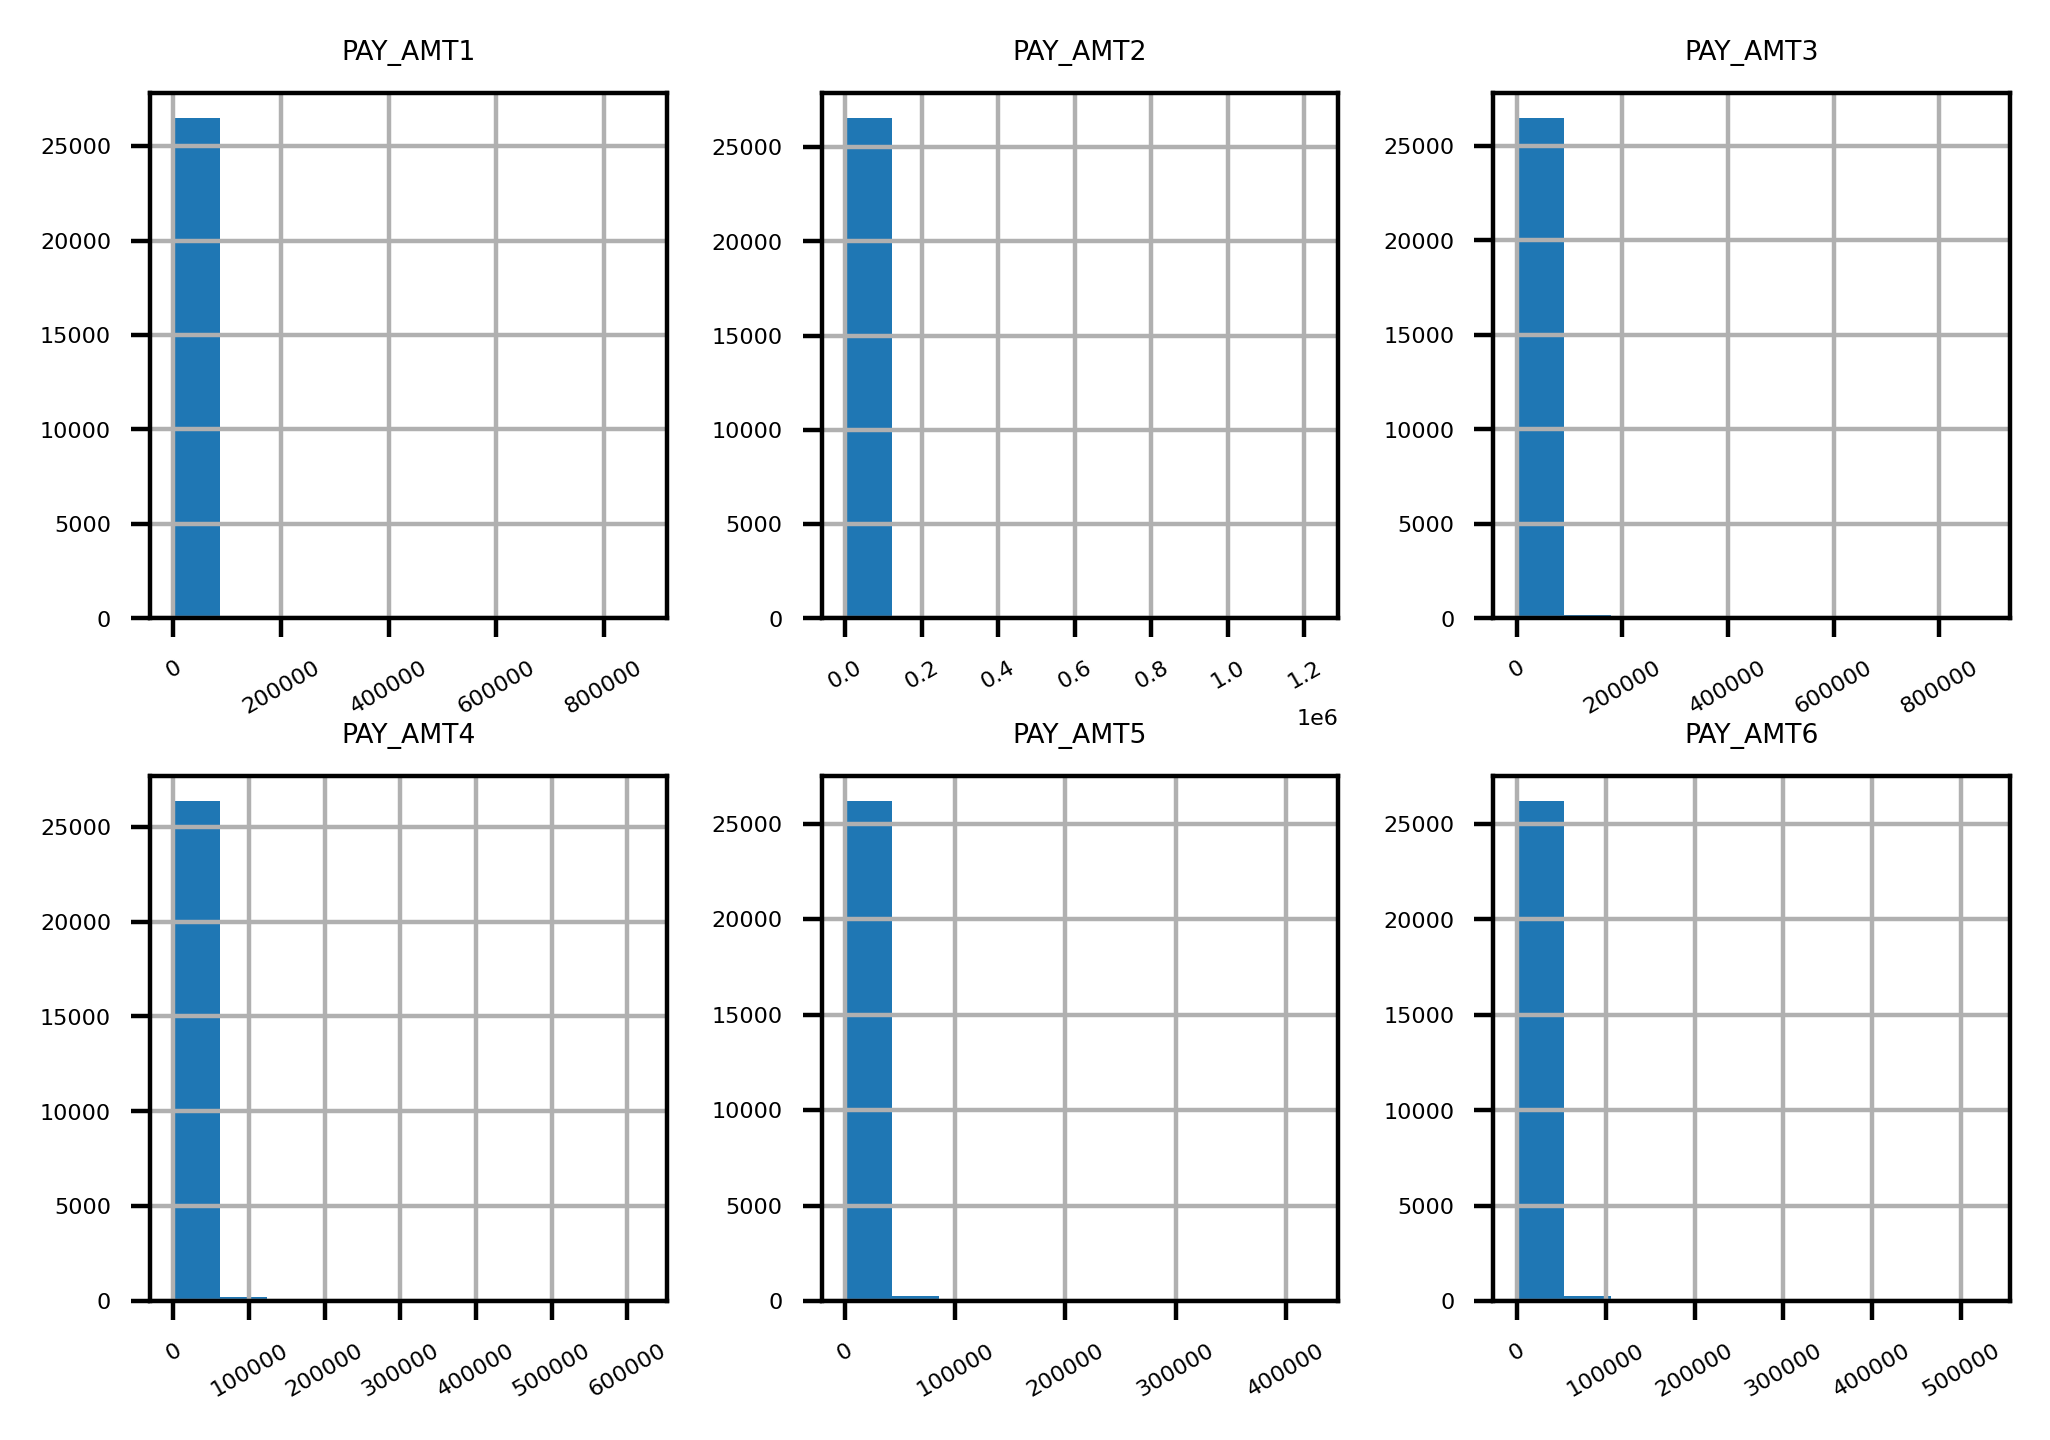

In [ ]:
df[pay_amt_feats].hist(layout=(2,3), xrot=30)

In [ ]:
pay_zero_mask=df[pay_amt_feats] ==0
# Use a Boolean mask to see how much of the payment amount data is exactly 
# equal to 0. Does this make sense given the histogram in the previous step?

In [ ]:
pay_zero_mask.head()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,True,False,True,True,True,True
1,True,False,False,False,True,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [ ]:
pay_zero_mask.sum()

PAY_AMT1    4656
PAY_AMT2    4833
PAY_AMT3    5293
PAY_AMT4    5697
PAY_AMT5    5981
PAY_AMT6    6373
dtype: int64

Ignoring the payments of 0 using the mask you created in the previous step, use pandas' .apply() and NumPy's np.log10() to plot histograms of logarithmic transformations of the non-zero payments. 

Consider the results

array([[<AxesSubplot: title={'center': 'PAY_AMT1'}>,
        <AxesSubplot: title={'center': 'PAY_AMT2'}>,
        <AxesSubplot: title={'center': 'PAY_AMT3'}>],
       [<AxesSubplot: title={'center': 'PAY_AMT4'}>,
        <AxesSubplot: title={'center': 'PAY_AMT5'}>,
        <AxesSubplot: title={'center': 'PAY_AMT6'}>]], dtype=object)

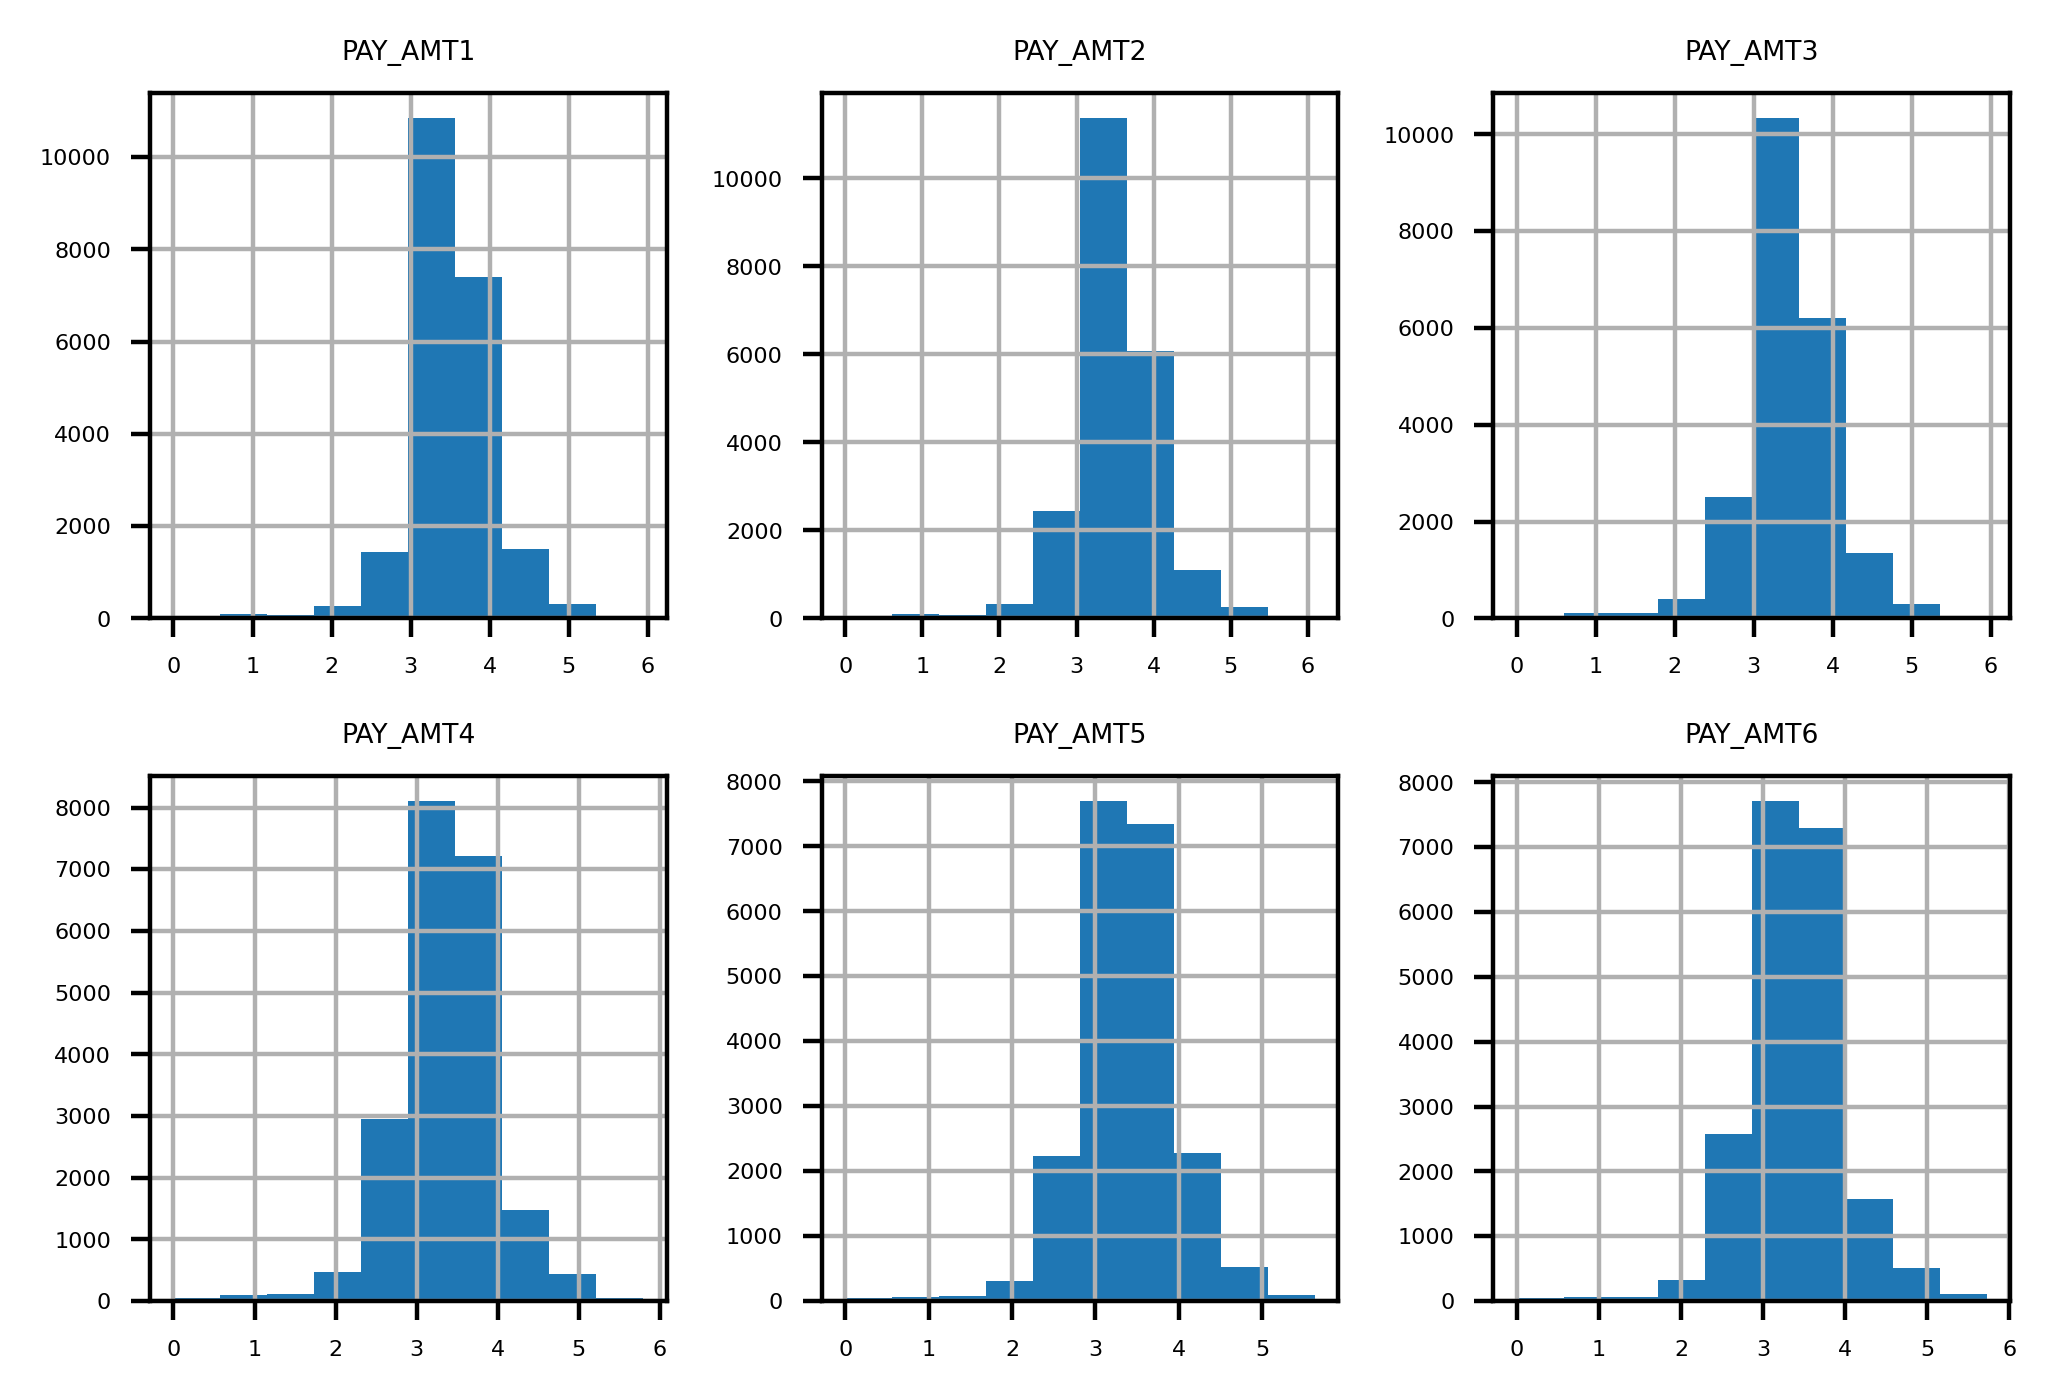

In [ ]:
df[pay_amt_feats][~pay_zero_mask].apply(np.log10).hist(layout=(2,3))

array([[<AxesSubplot: title={'center': 'PAY_AMT1'}>,
        <AxesSubplot: title={'center': 'PAY_AMT2'}>,
        <AxesSubplot: title={'center': 'PAY_AMT3'}>],
       [<AxesSubplot: title={'center': 'PAY_AMT4'}>,
        <AxesSubplot: title={'center': 'PAY_AMT5'}>,
        <AxesSubplot: title={'center': 'PAY_AMT6'}>]], dtype=object)

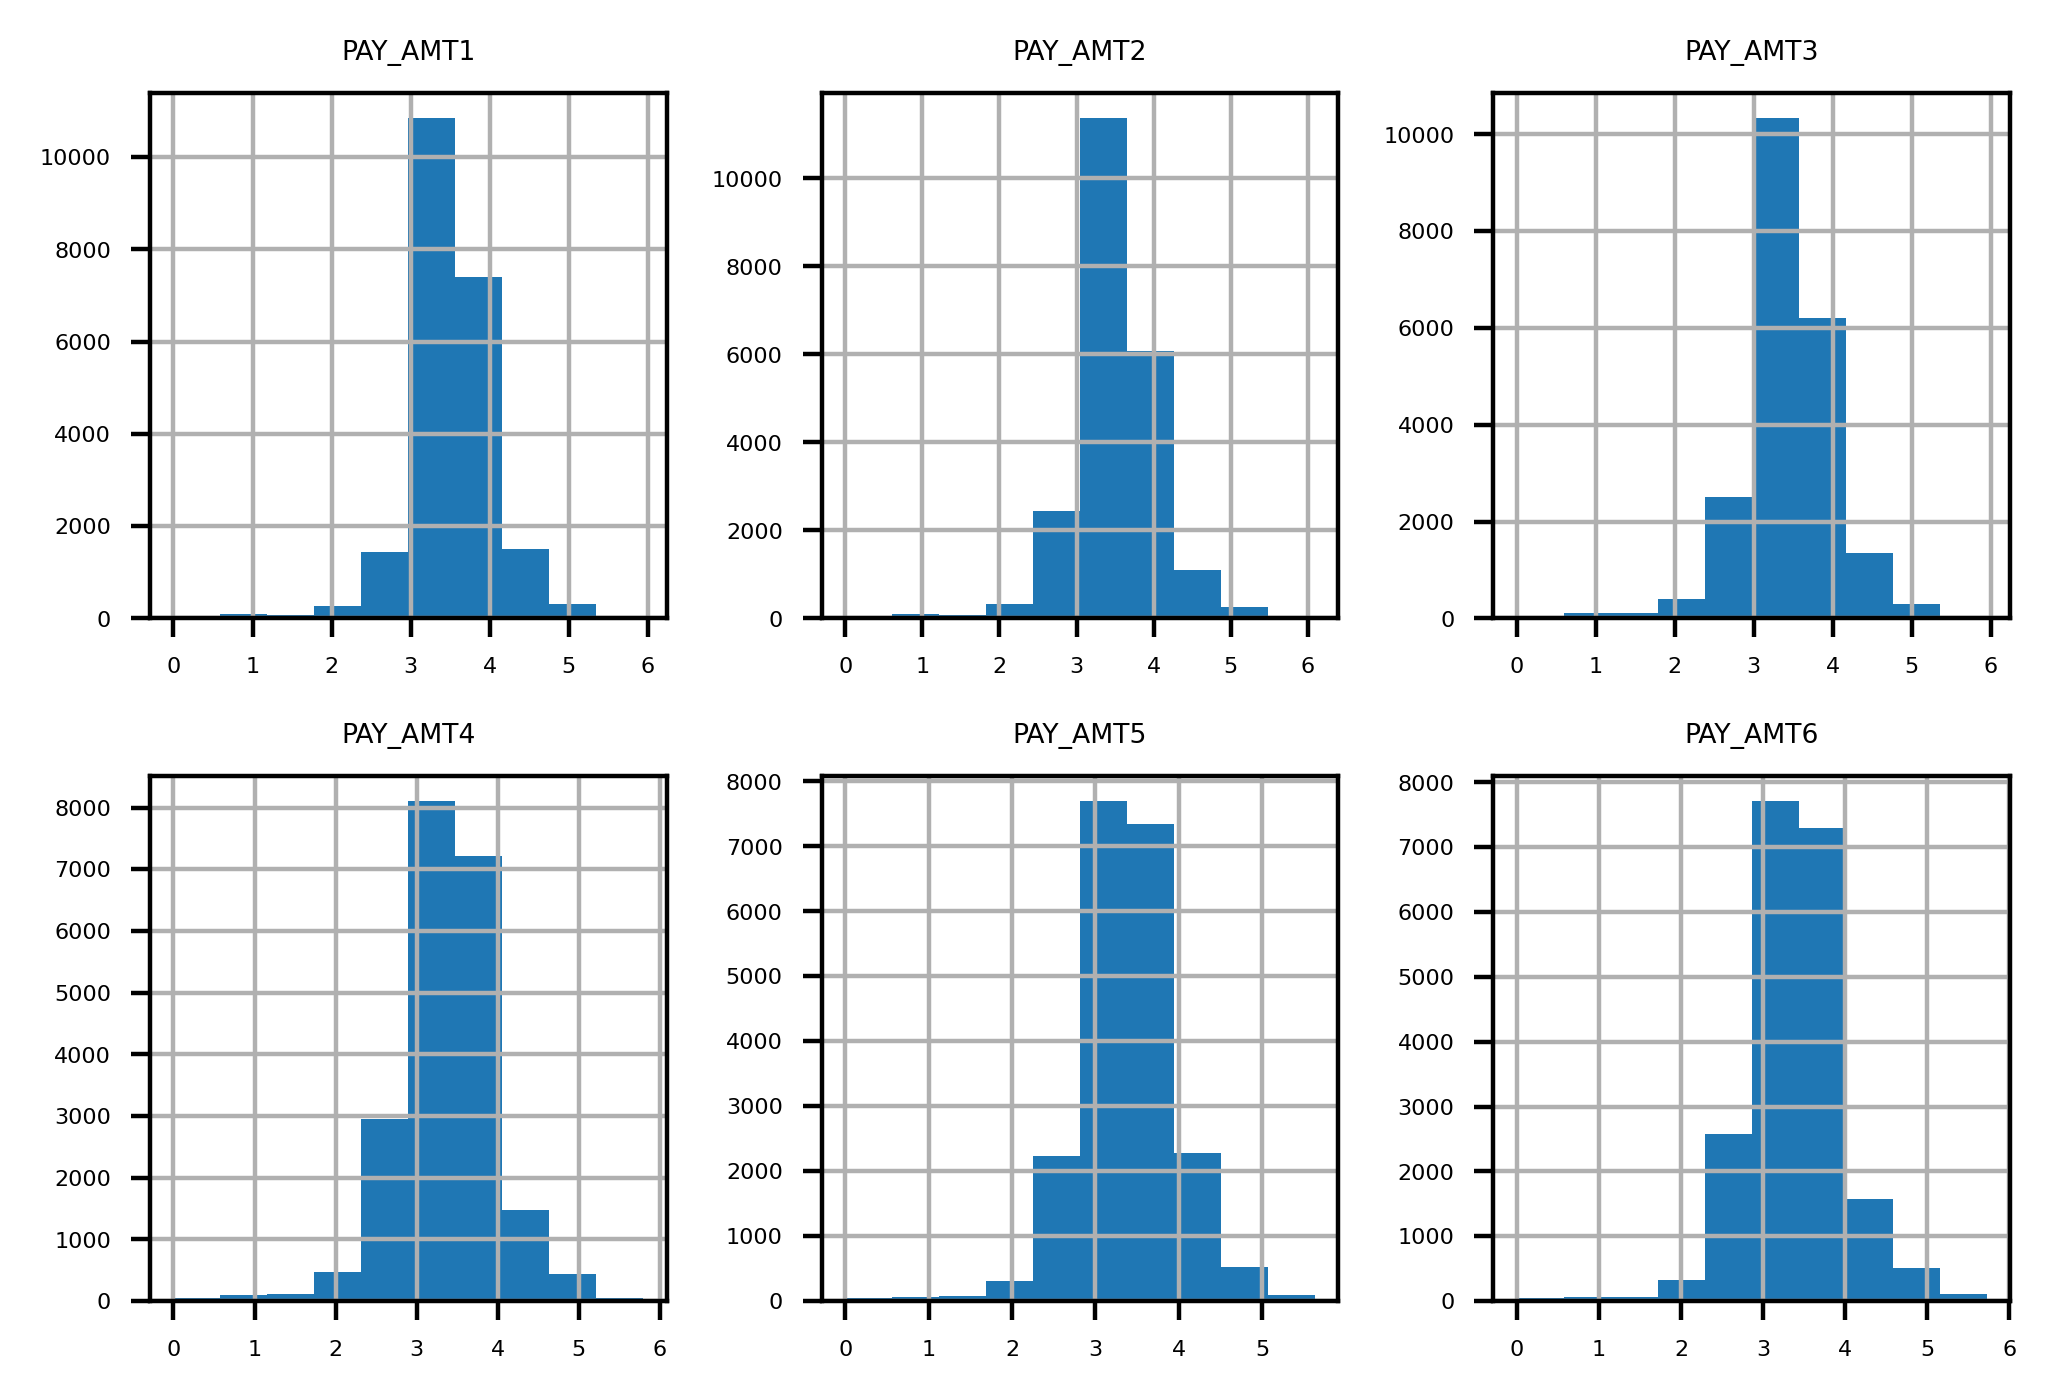

In [ ]:
df[pay_amt_feats][~pay_zero_mask].apply(np.log10).hist(layout=(2,3))

In [ ]:
j